In [22]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from scipy.stats import gaussian_kde
from scipy.stats import entropy
import geopandas as gpd
# import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.backends.backend_pdf import PdfPages
import sys
sys.path.append('/project/lhansen/HMC_re/project-amazon/')
from pysrc.sampling import gibbs_sampling
from pysrc.sampling import theta_adj_reg_data
# import pathlib
# temp = pathlib.PosixPath
# pathlib.PosixPath = pathlib.WindowsPath


    
site=78



base_folder = "/project/lhansen/HMC_re/project-amazon/output/sampling/gams/78sites/pa_41.11/"

with open(base_folder+'xi_1/pe_5.3/results.pcl', 'rb') as f:
    # Load the data from the file
    results_adjusted = pickle.load(f)    
beta_hmc =results_adjusted["final_sample_coe"][:,:8]
v_hmc = results_adjusted["V_theta_sample"]

In [23]:

res = gibbs_sampling("theta")
theta_mean = res['beta_theta_mean']
theta_vcov = res['beta_theta_vcov']
beta_ori = np.random.multivariate_normal(theta_mean,theta_vcov,size=50000)
v_mean = res['V_theta_mean']
v_var   = res['V_theta_var']
v_ori = np.zeros((50000,62))

for i in range(62):
    v_ori[:,i] = np.random.normal(v_mean[i],np.sqrt(v_var[i]),size=50000)

In [24]:
mean_pa_2017=44.97362
theta_data= gpd.read_file("/project/lhansen/HMC_re/project-amazon/data/calibration/hmc/theta_fit_78.geojson")

X_fit = theta_adj_reg_data(78,theta_data)['X_theta']
weights = theta_adj_reg_data(78,theta_data)['SG_theta']
fit_ids = theta_data["group_id"].values -1   # Column 8 as site_ids
fit_ids = fit_ids.astype(int)
site_theta= np.exp(X_fit @ beta_ori.T + v_ori[:, fit_ids].T)
theta_baseline = (weights@site_theta/mean_pa_2017).T


theta_hmc=results_adjusted["final_sample"][:, :78] 

/home/pengyu/.conda/envs/hmc/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: Several features with id = 1 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


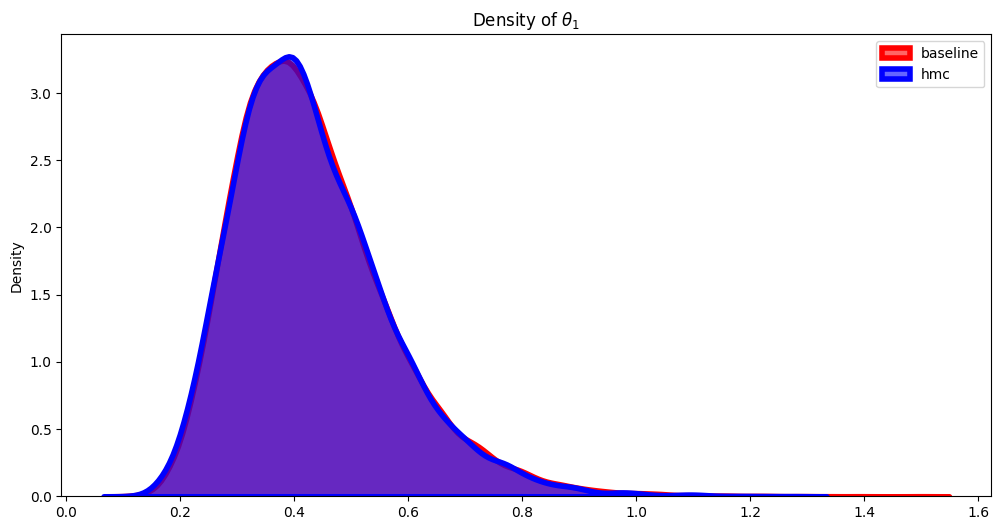

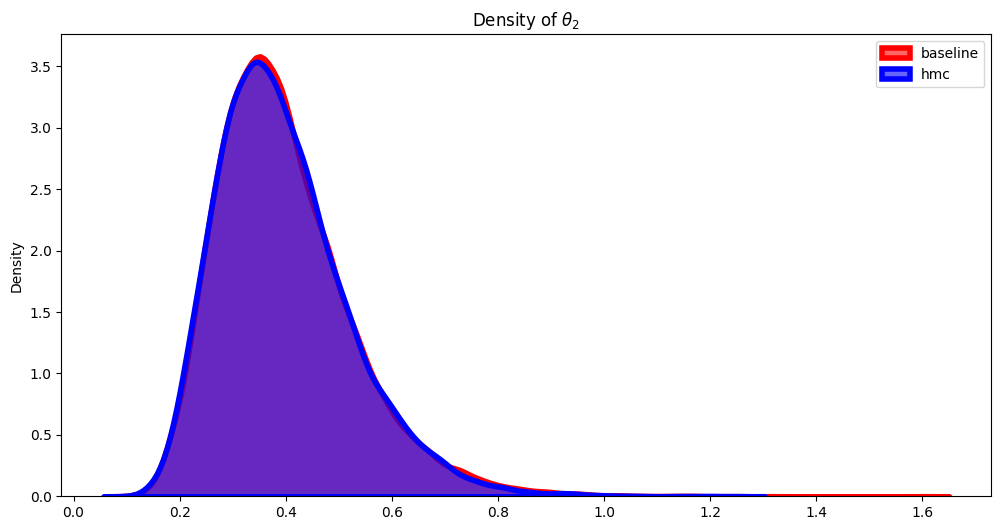

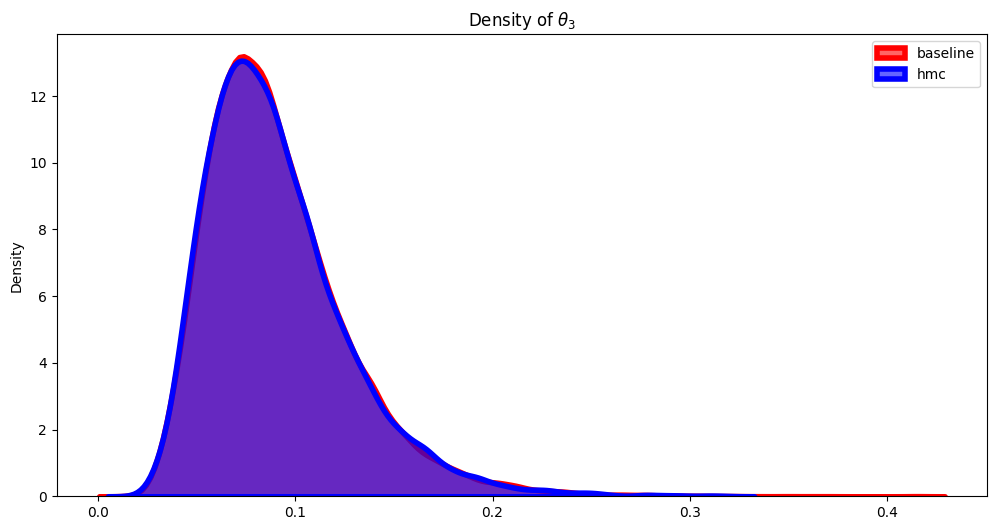

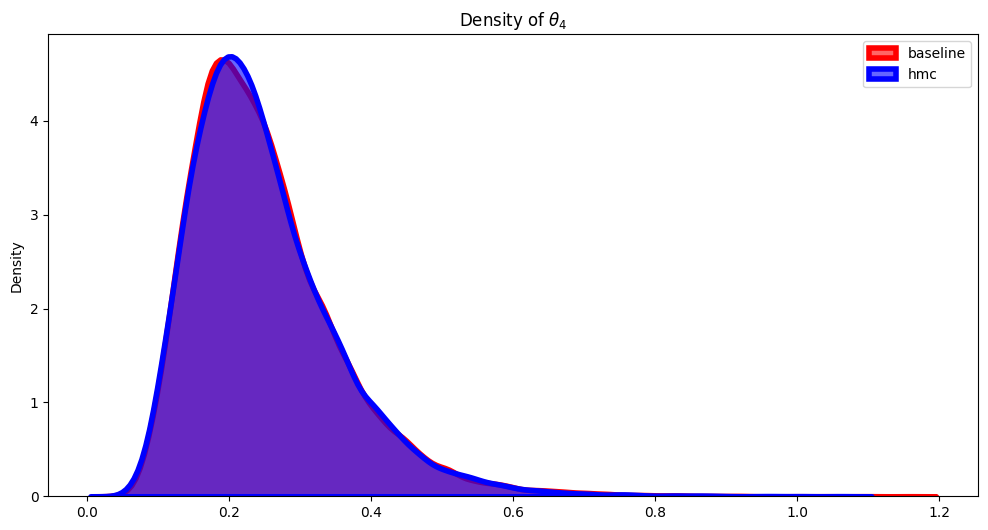

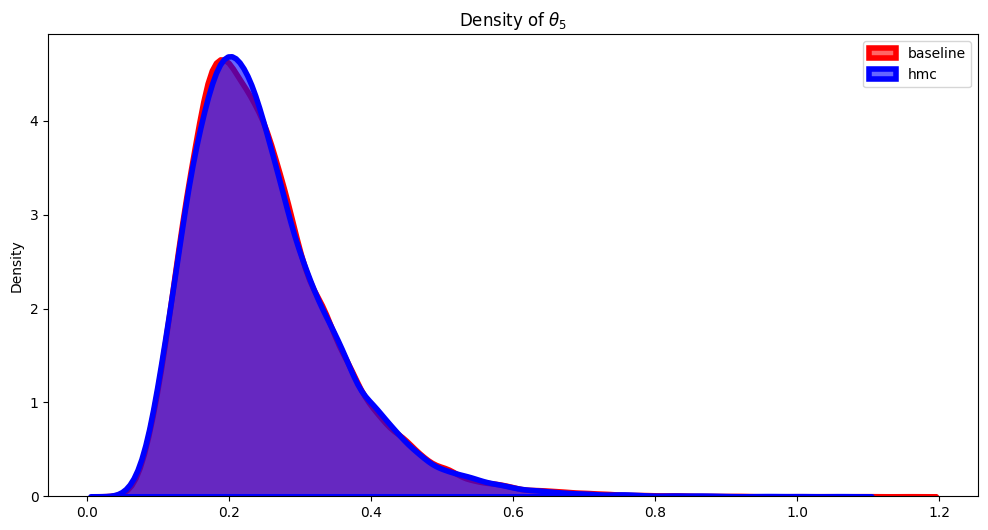

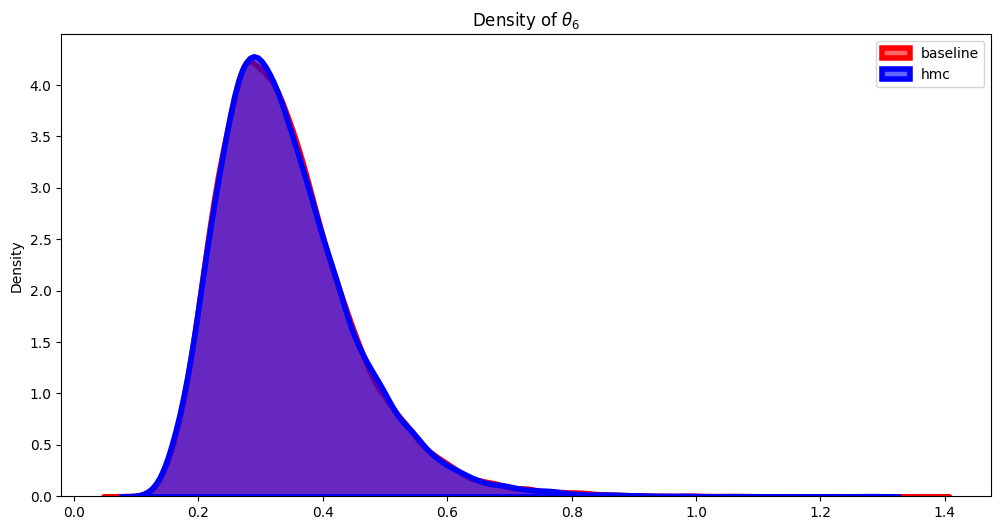

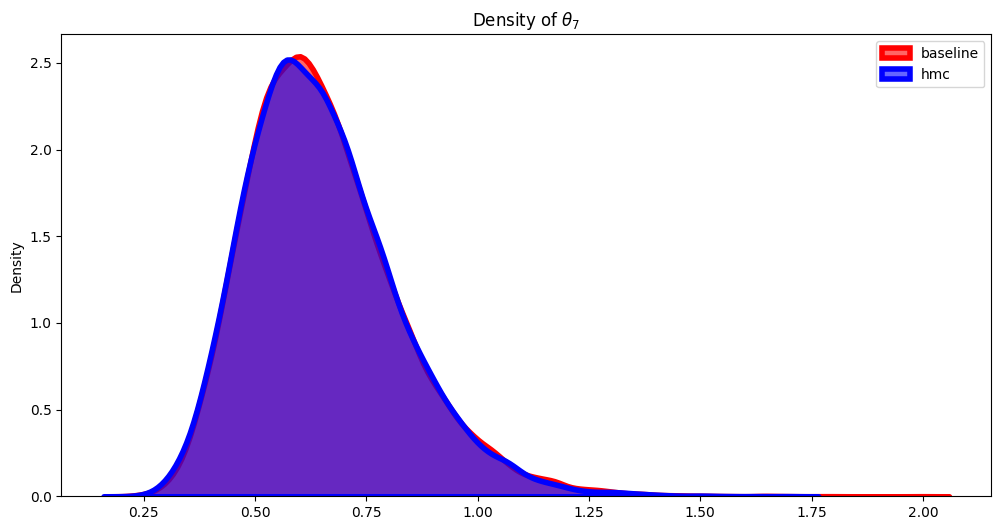

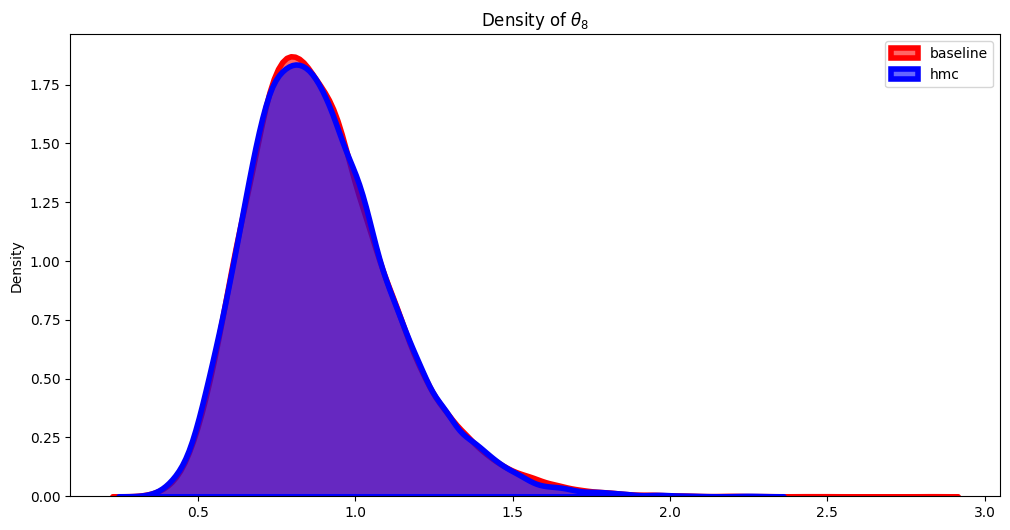

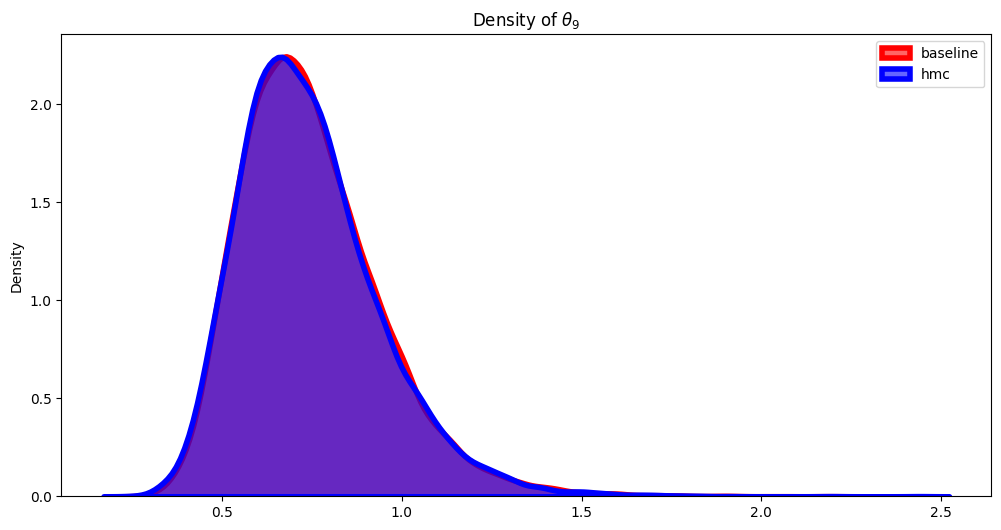

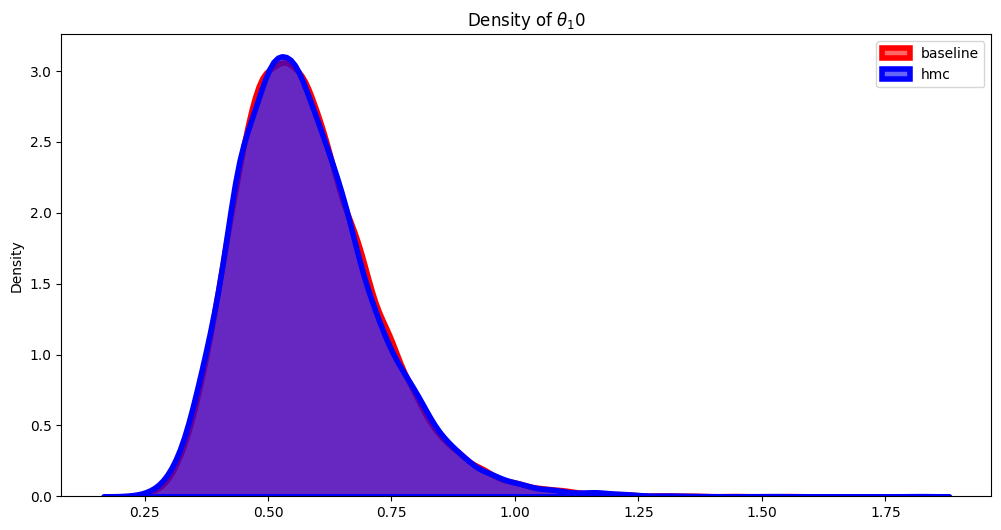

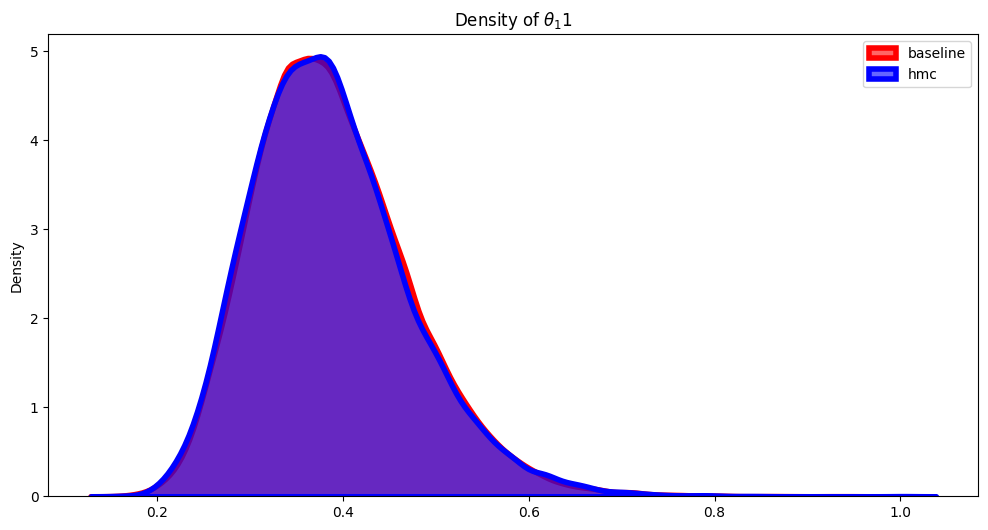

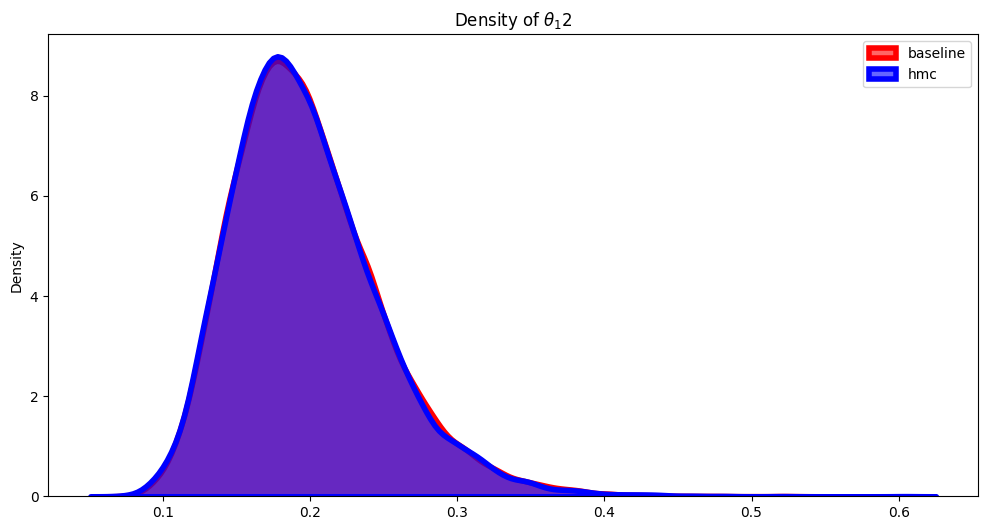

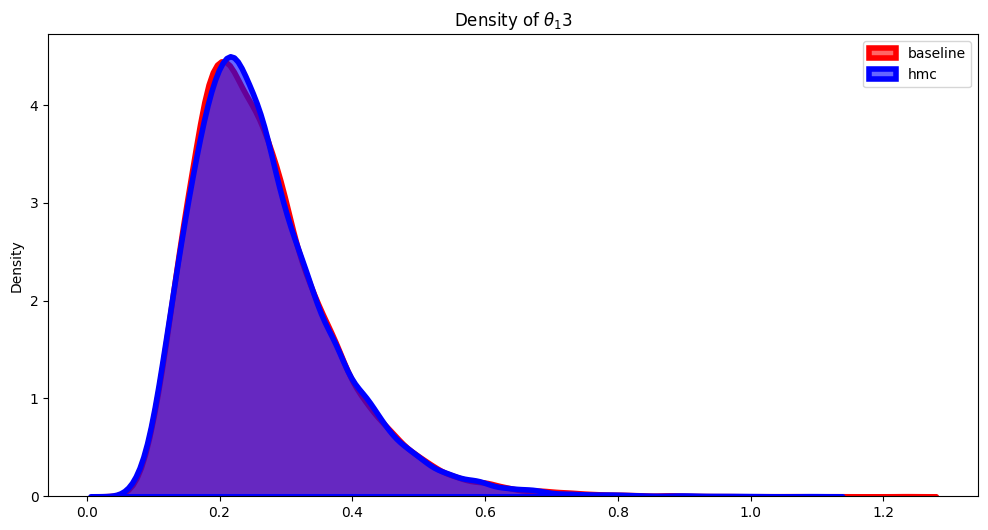

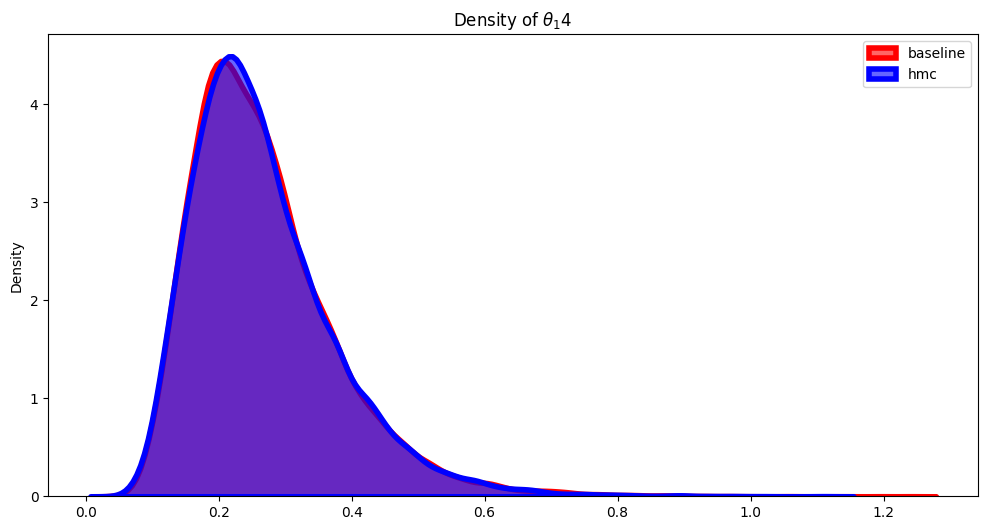

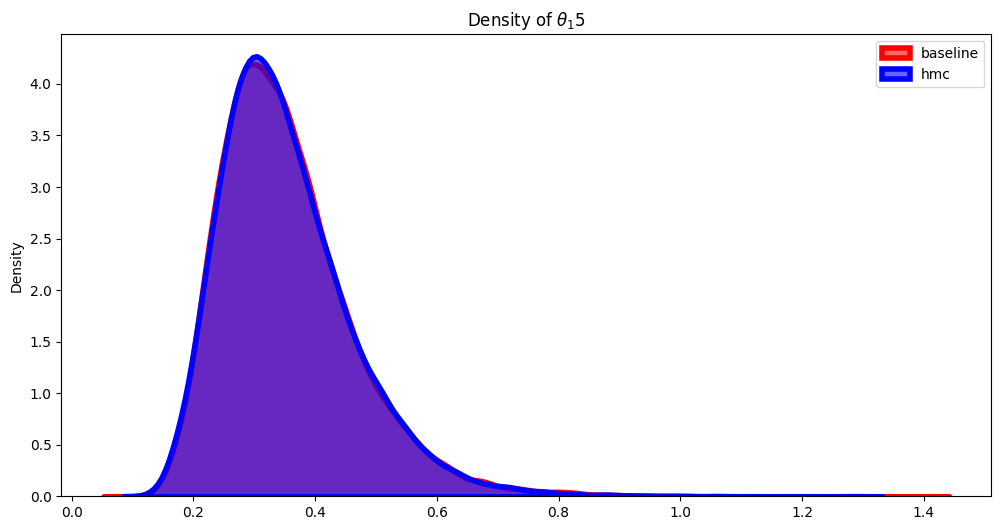

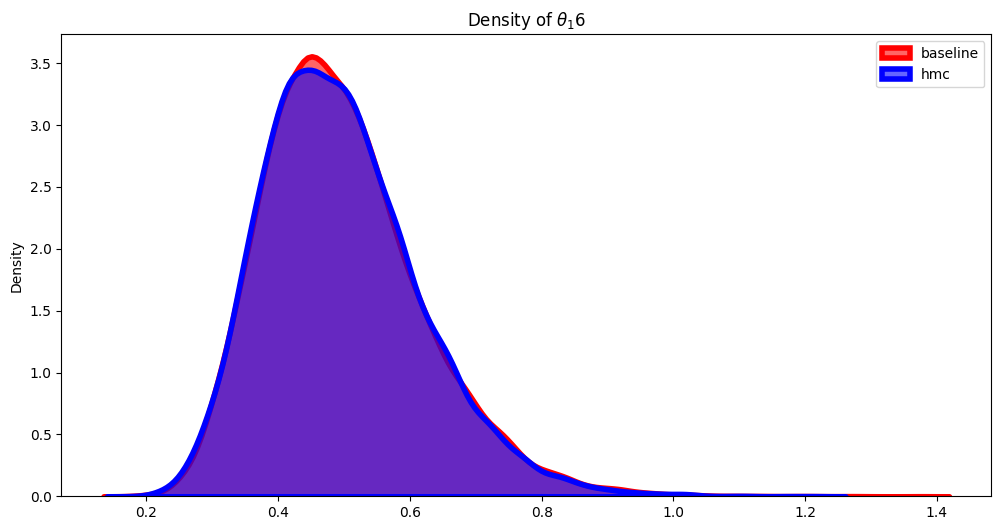

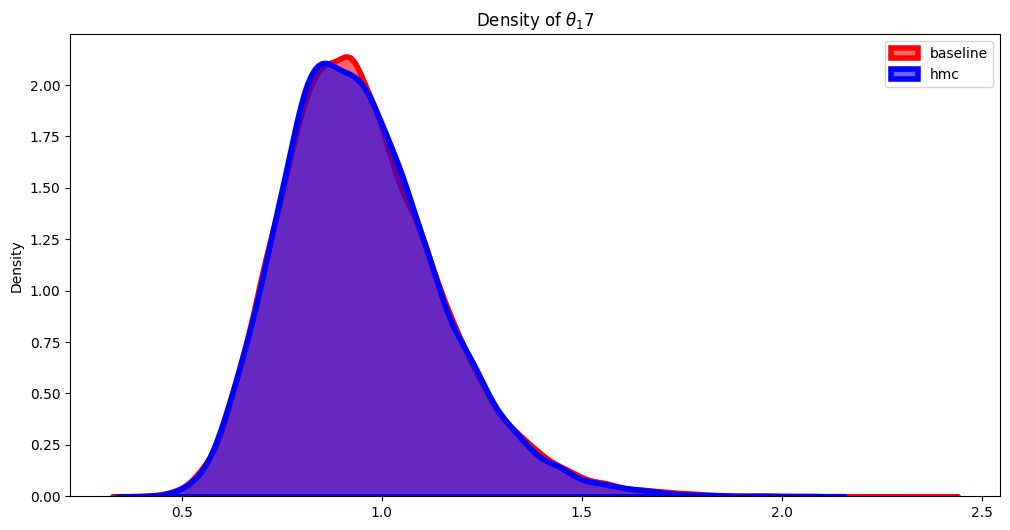

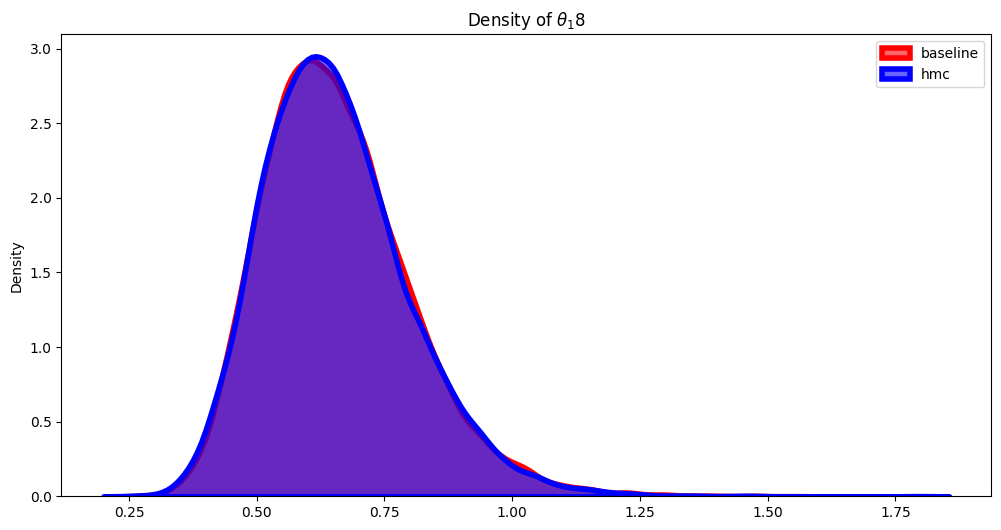

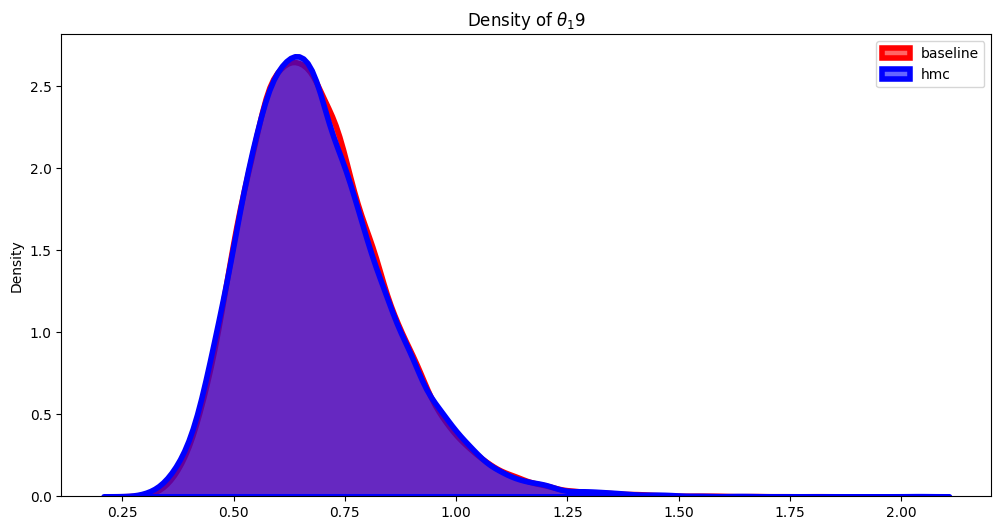

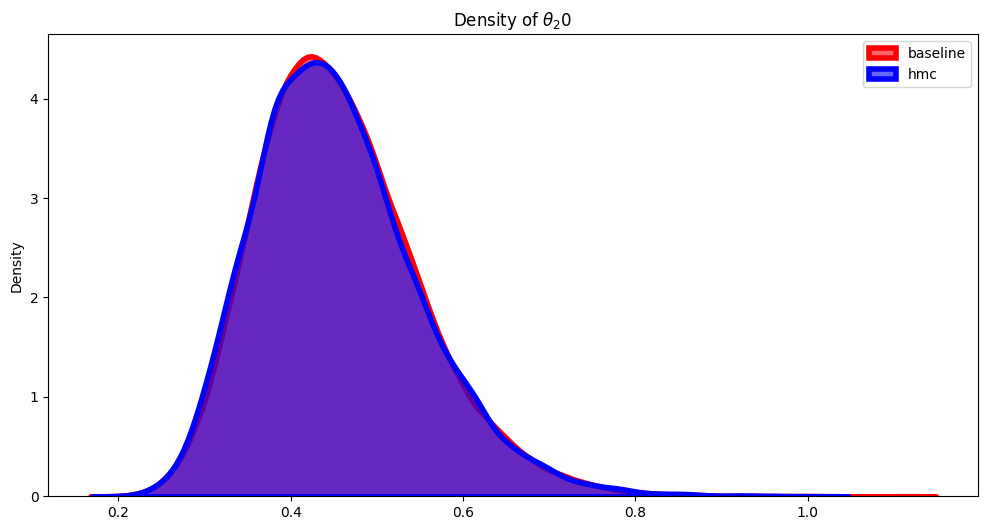

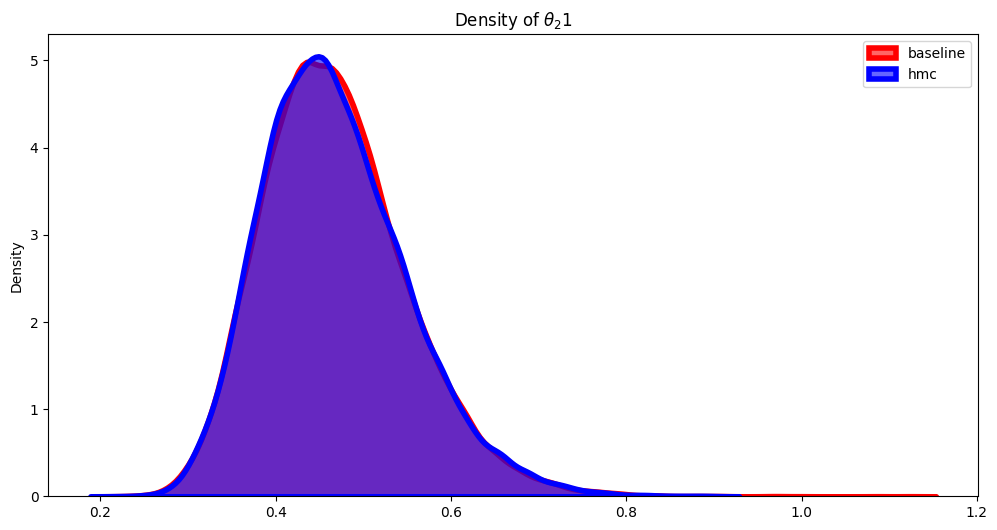

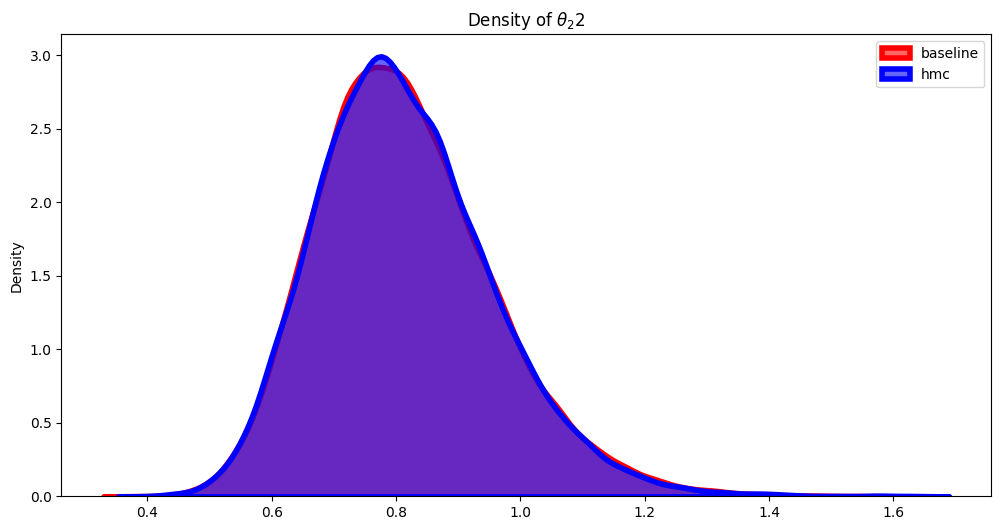

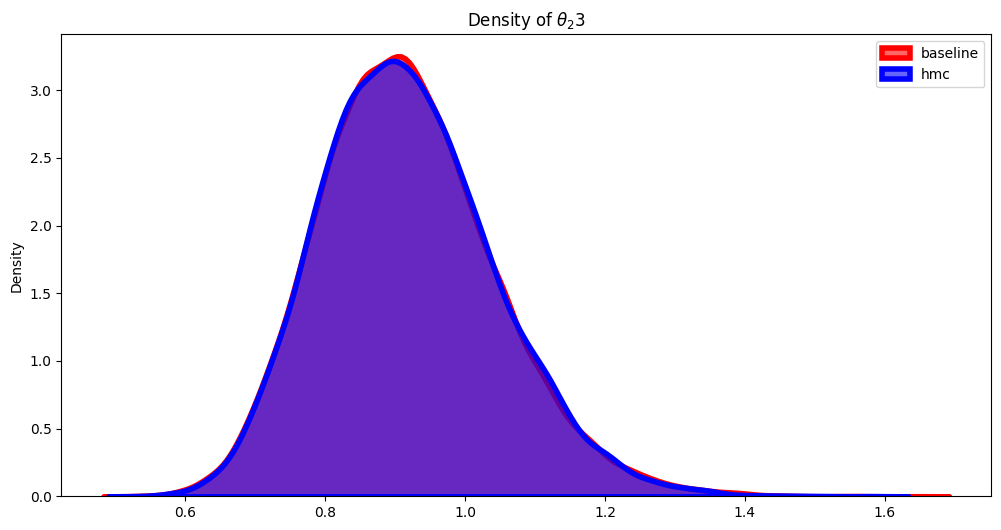

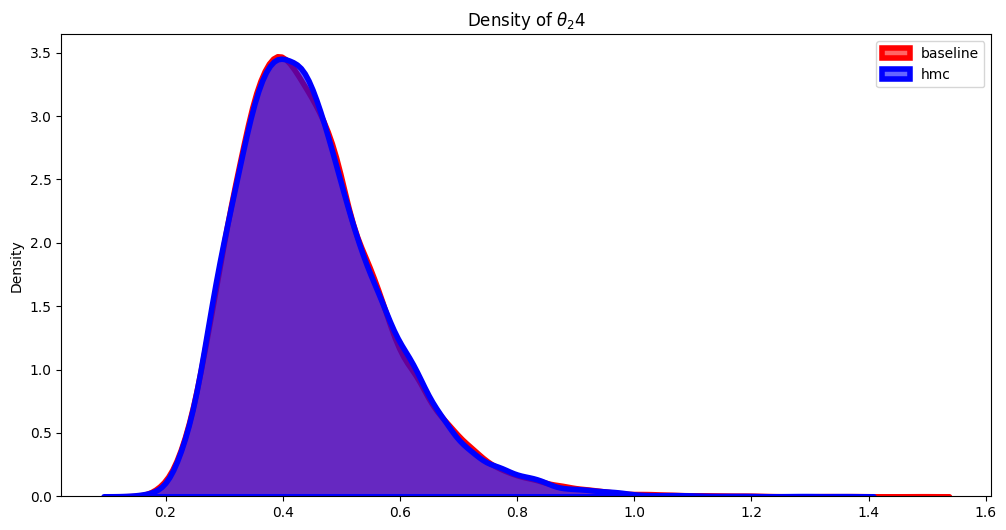

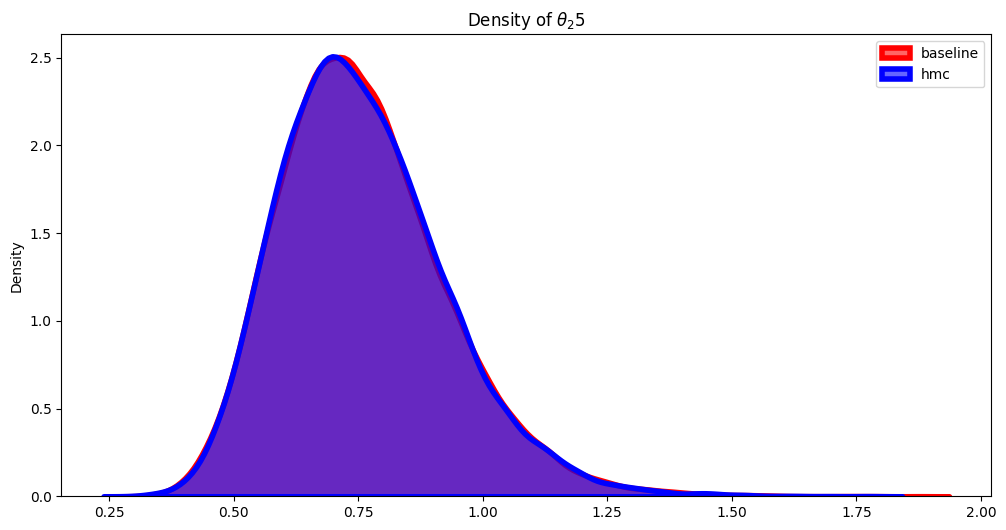

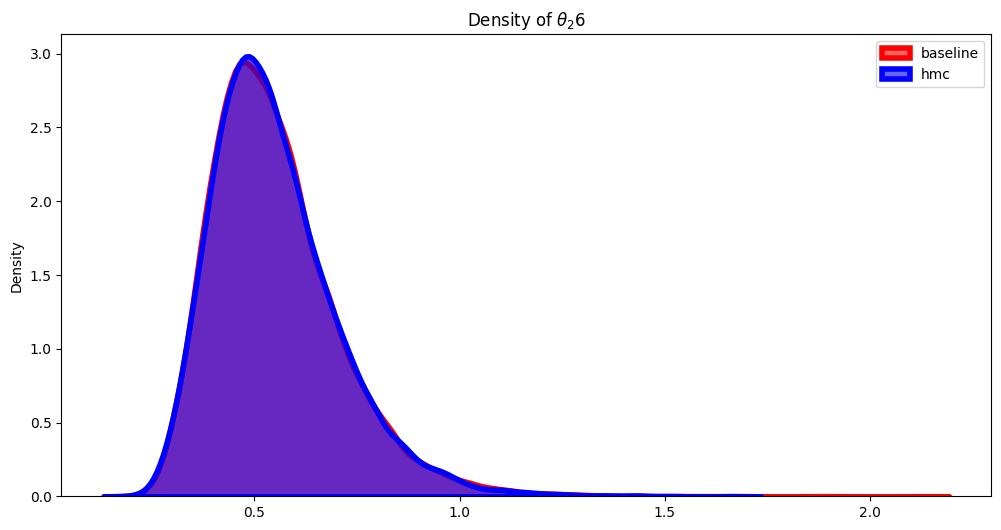

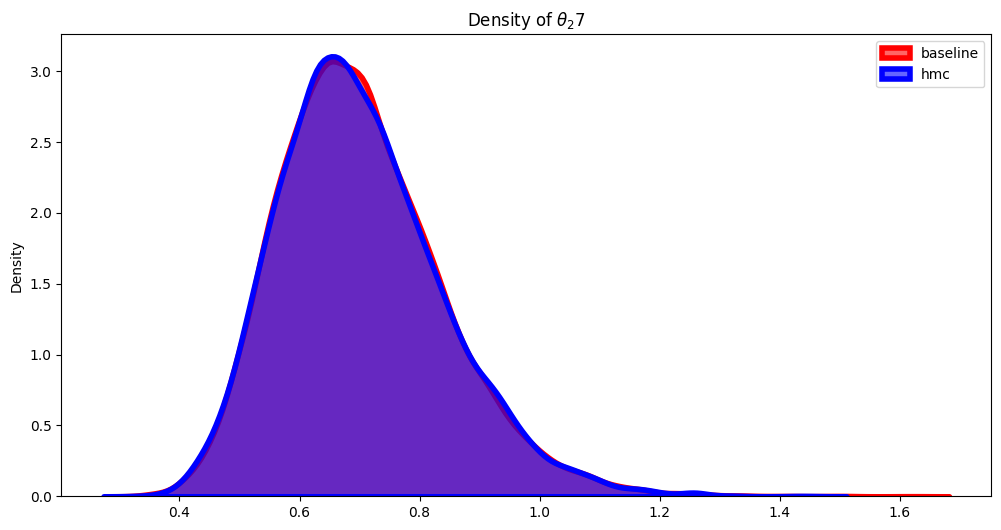

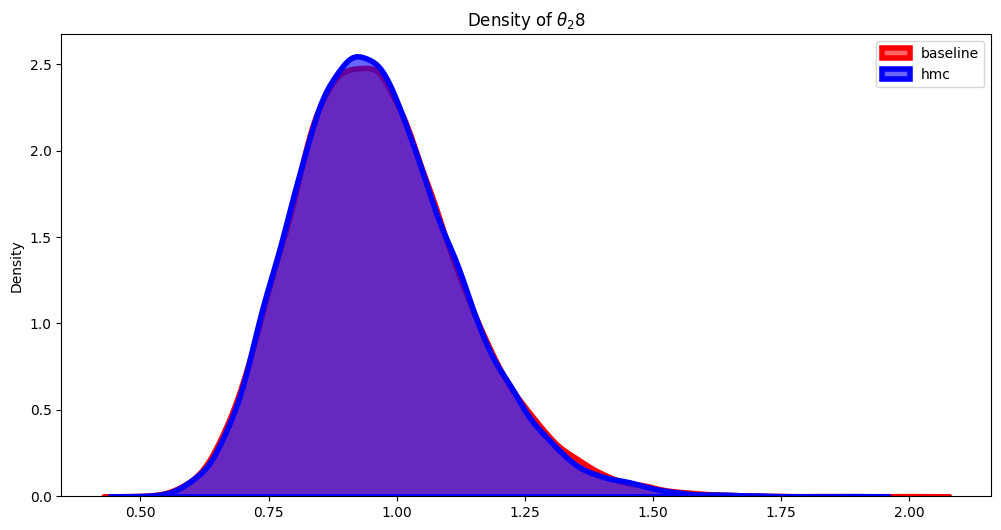

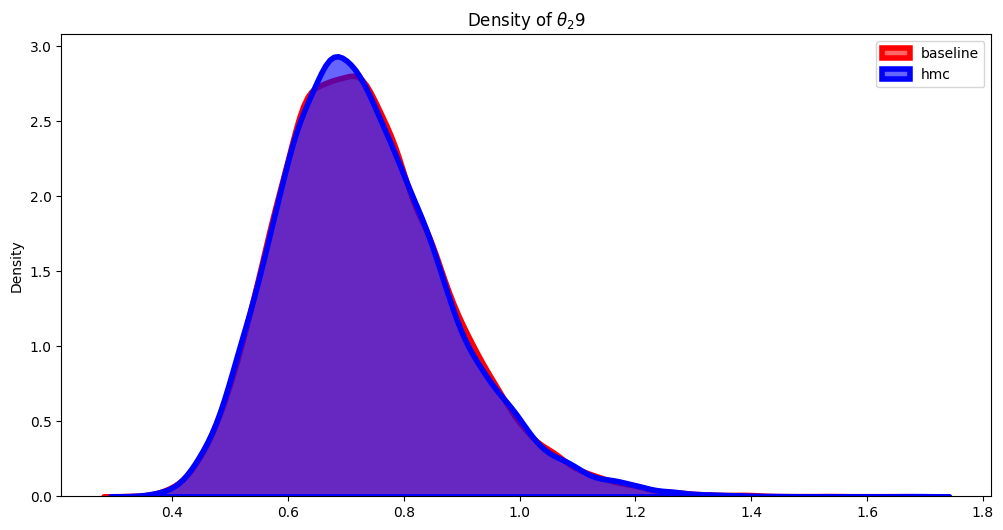

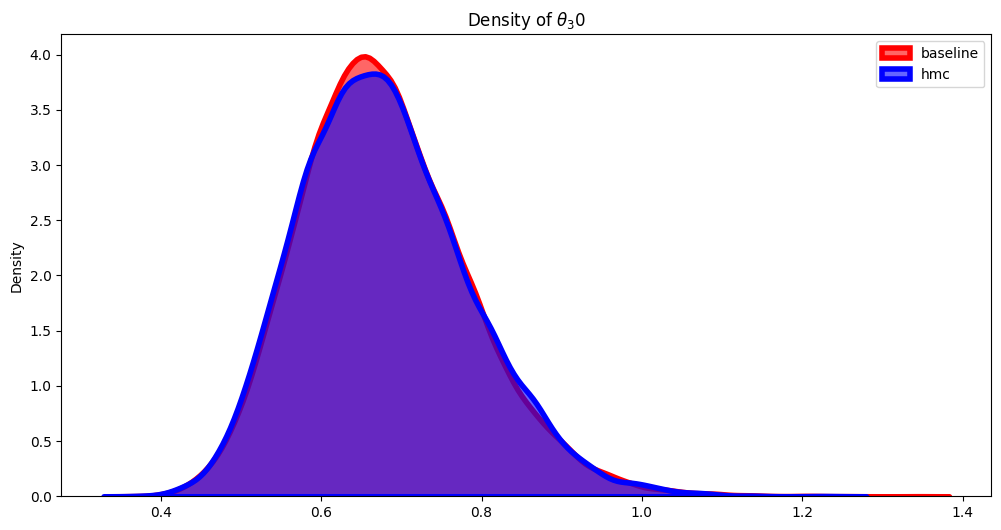

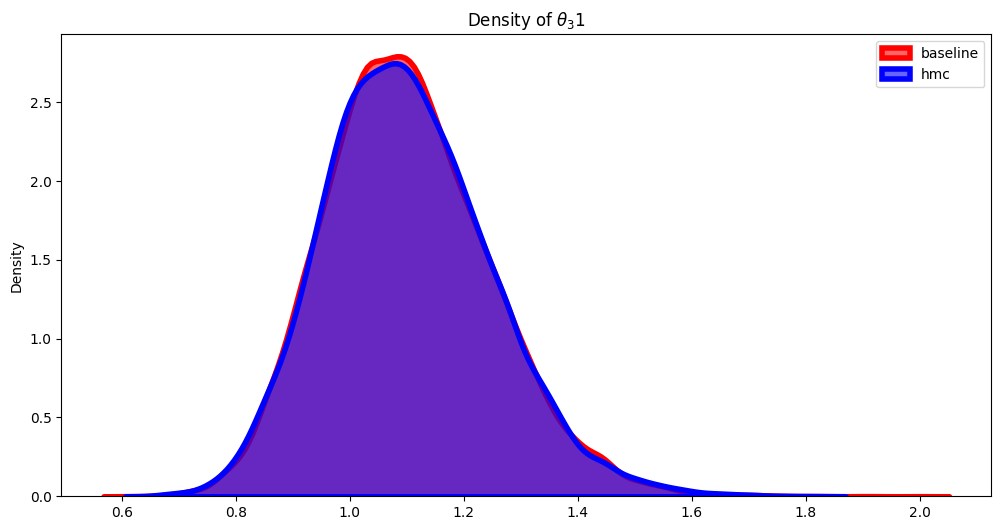

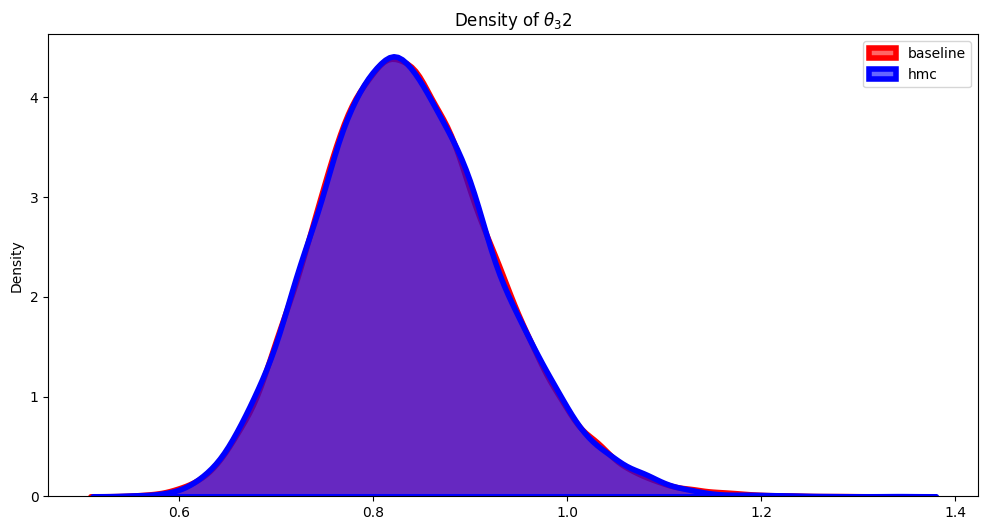

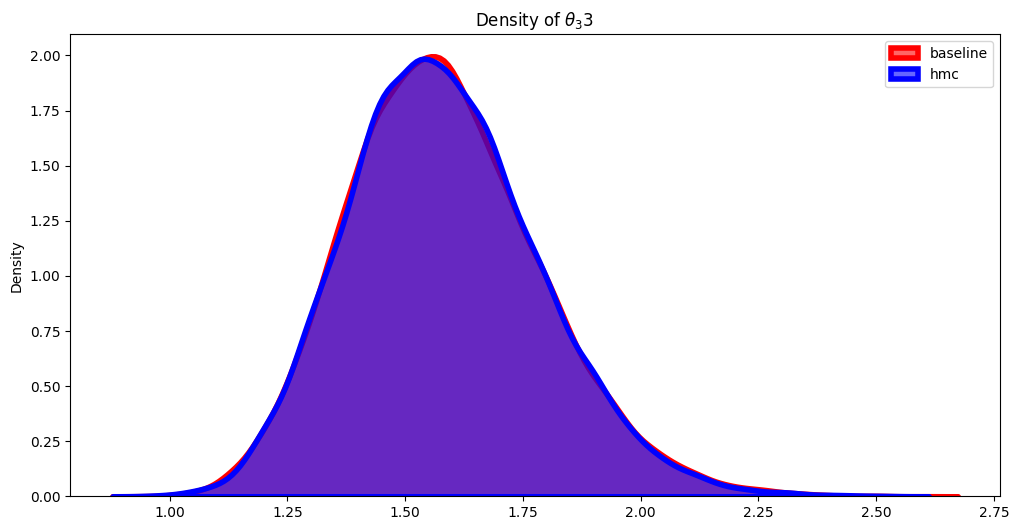

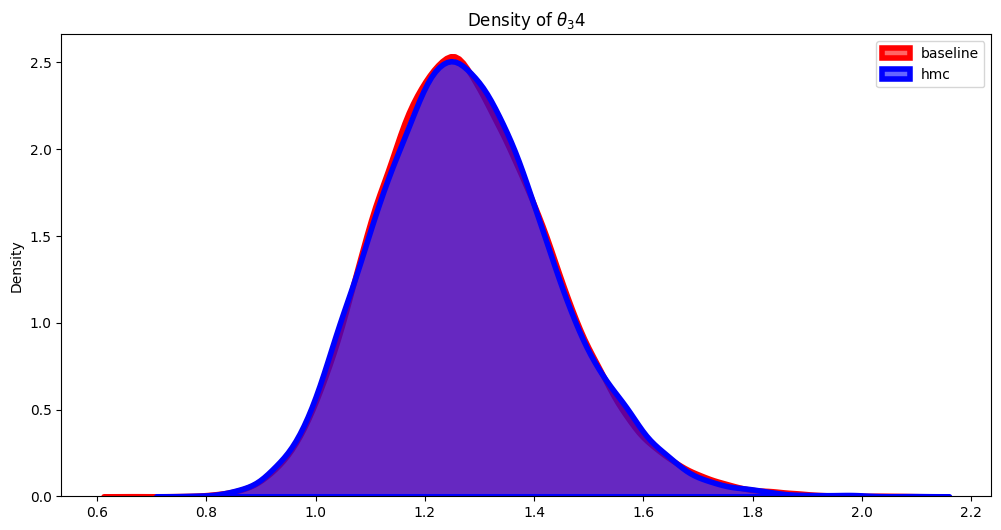

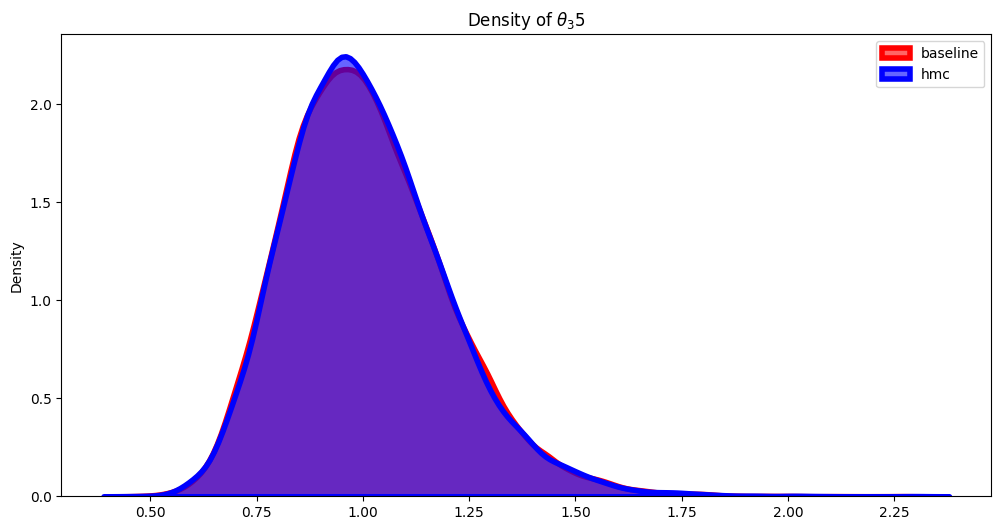

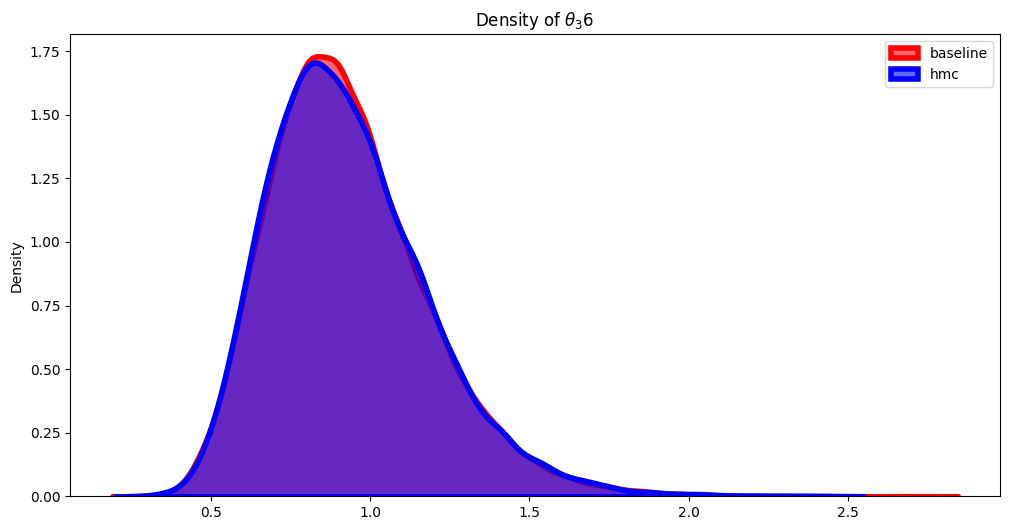

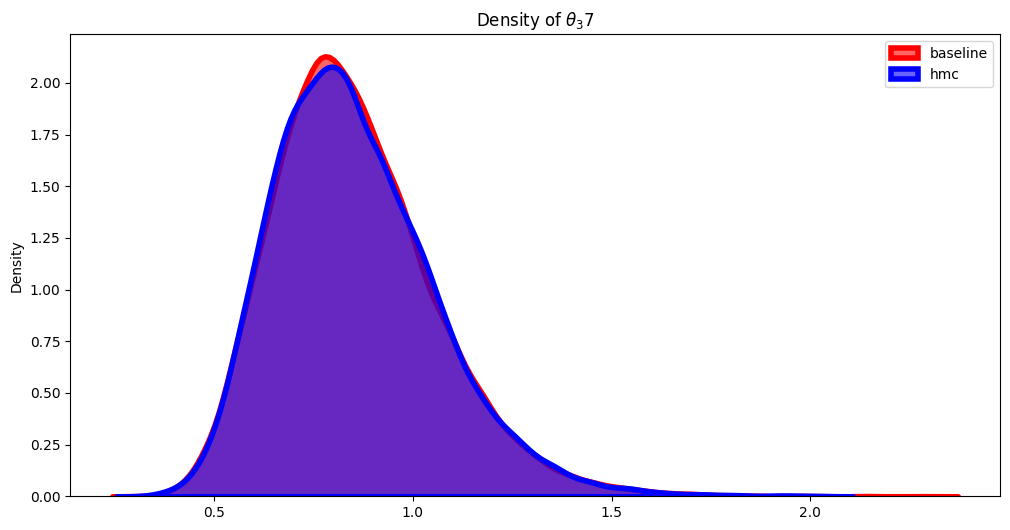

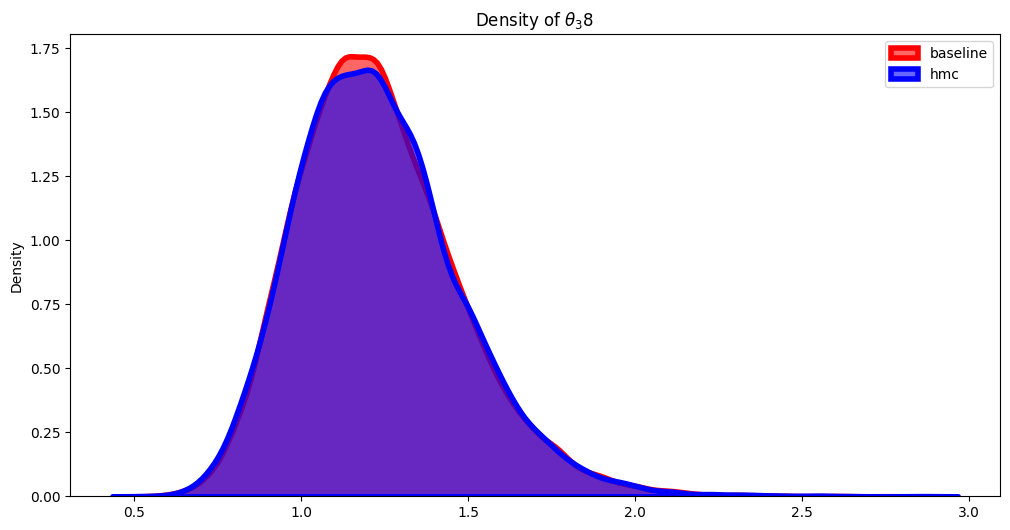

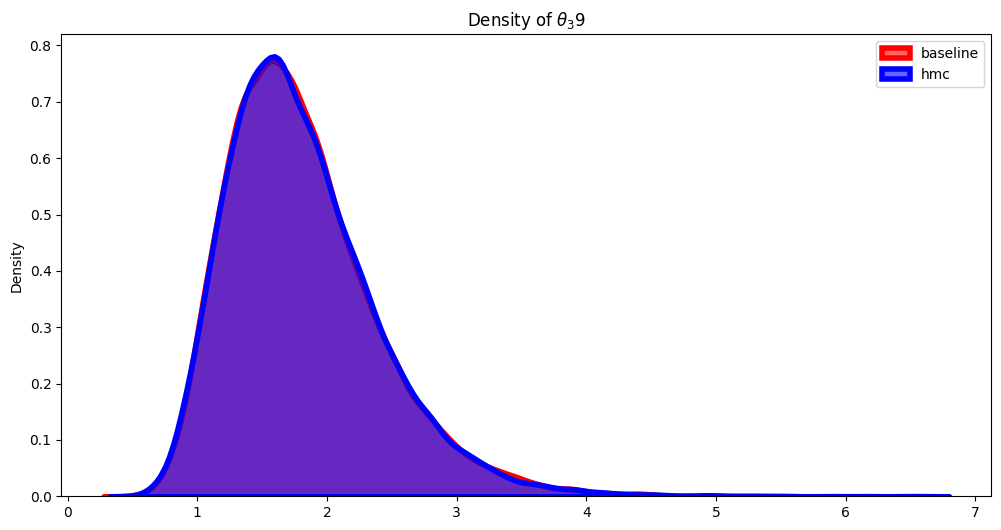

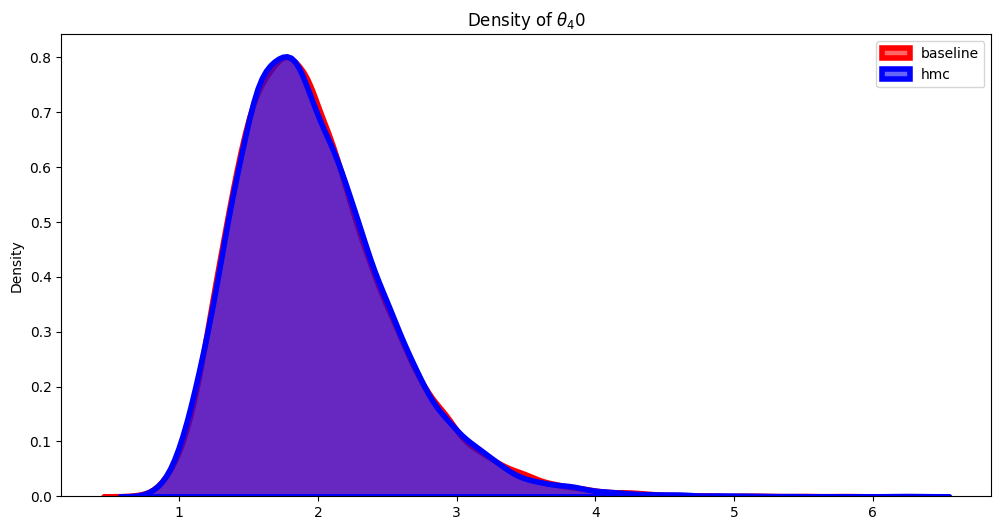

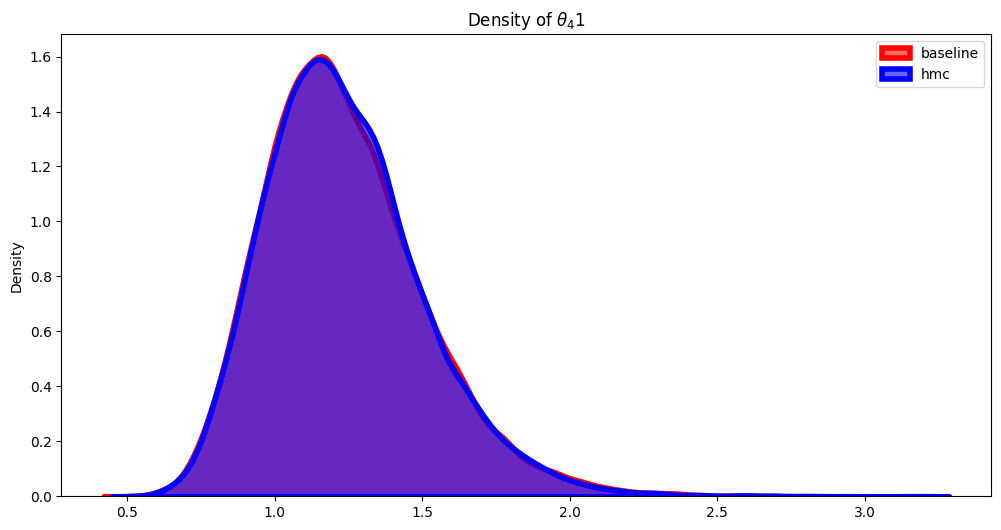

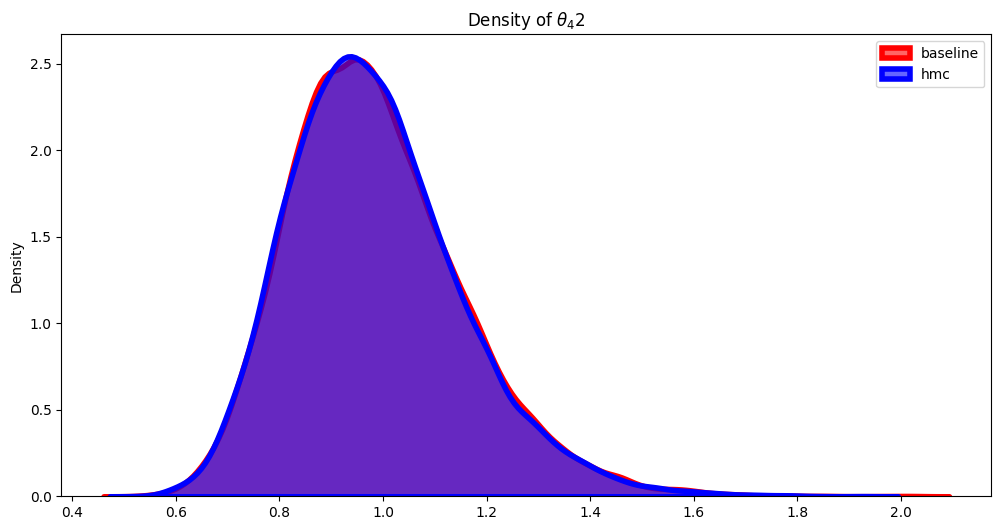

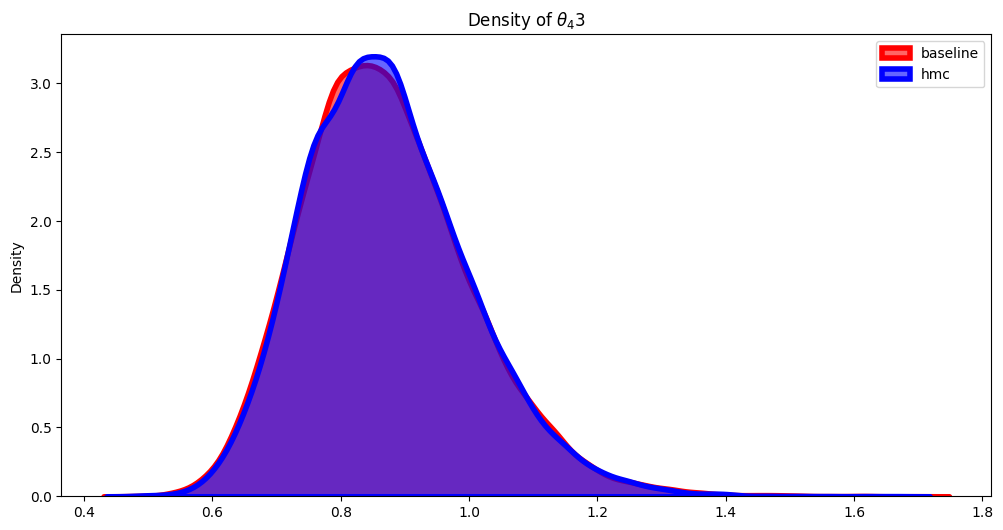

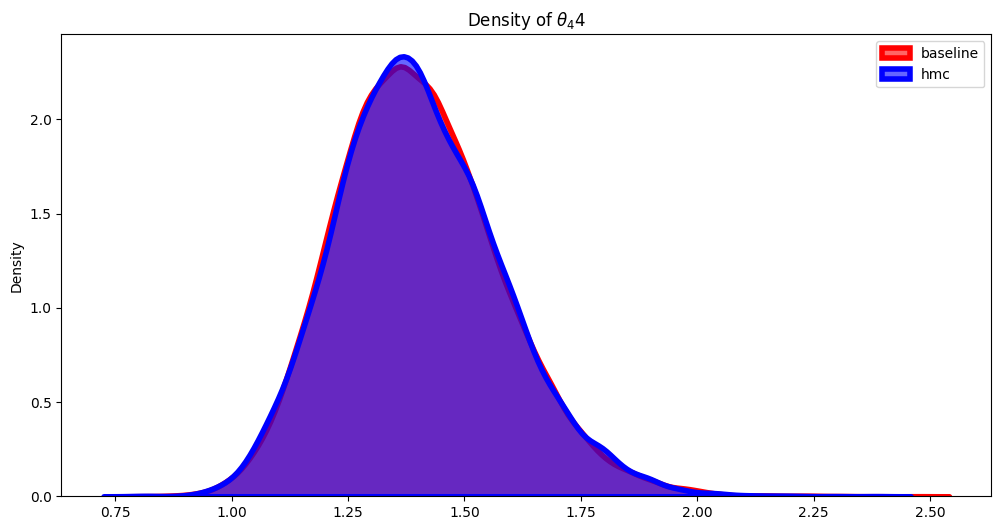

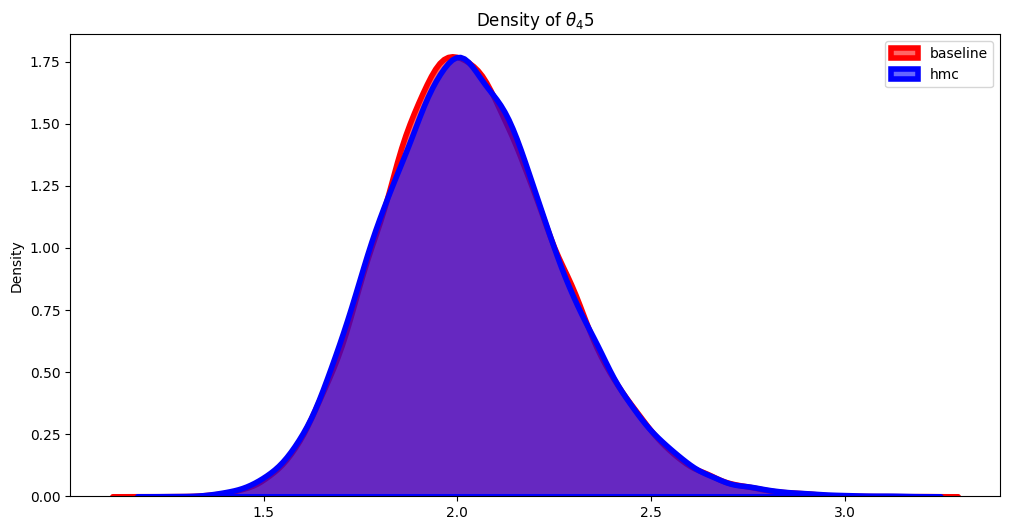

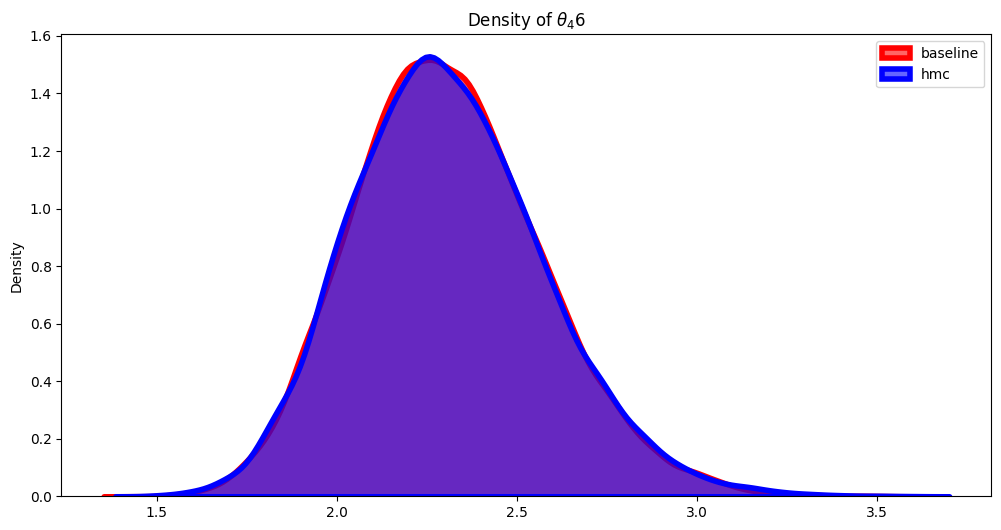

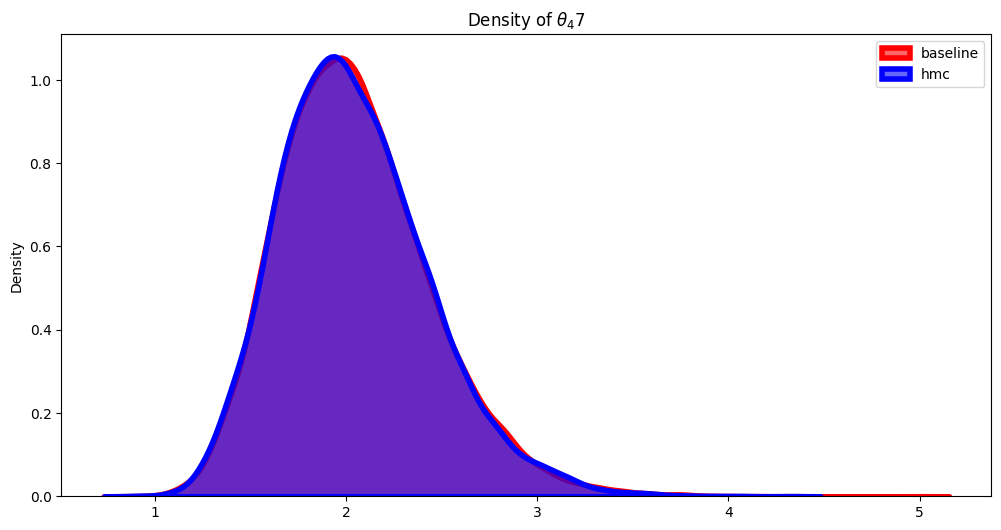

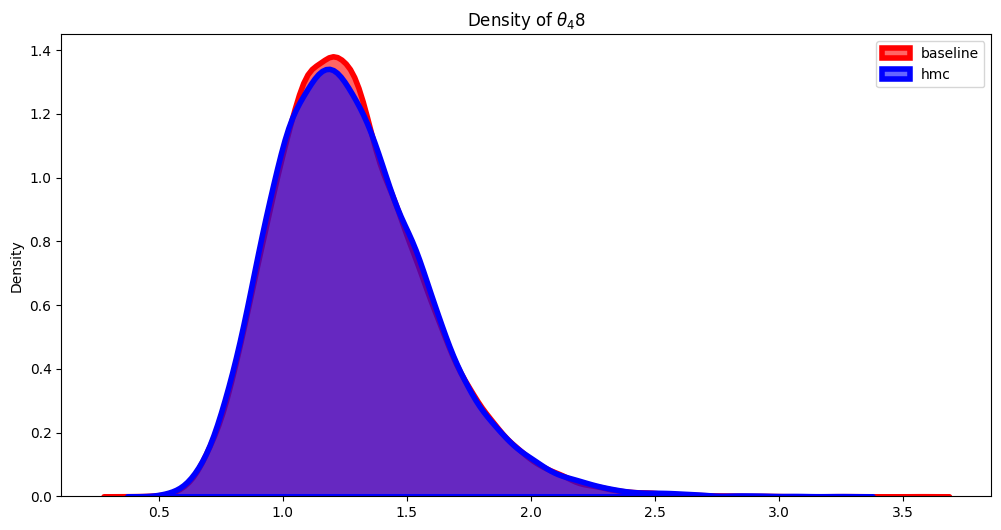

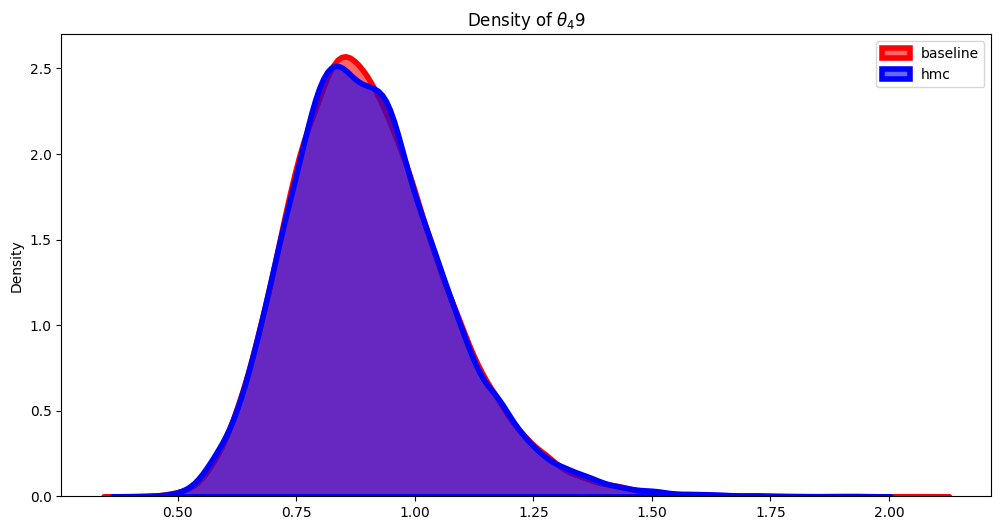

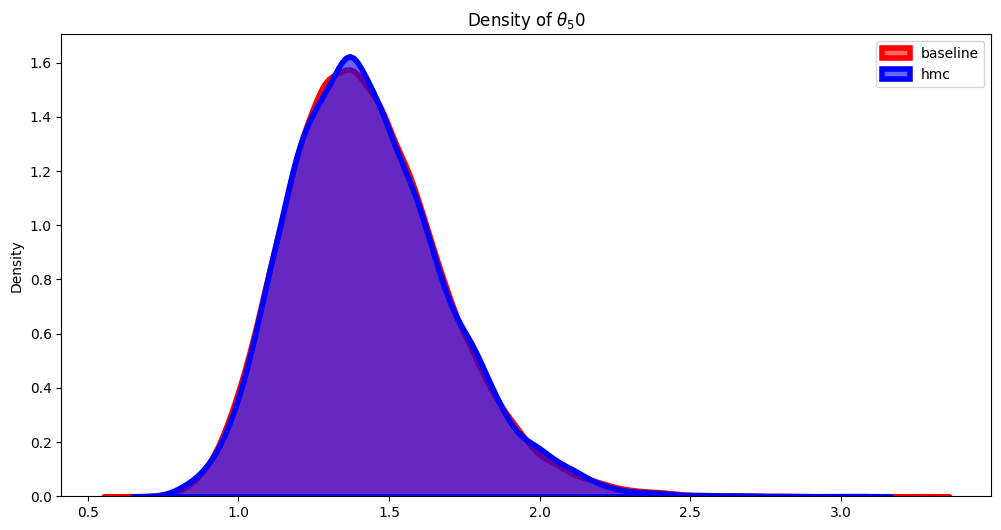

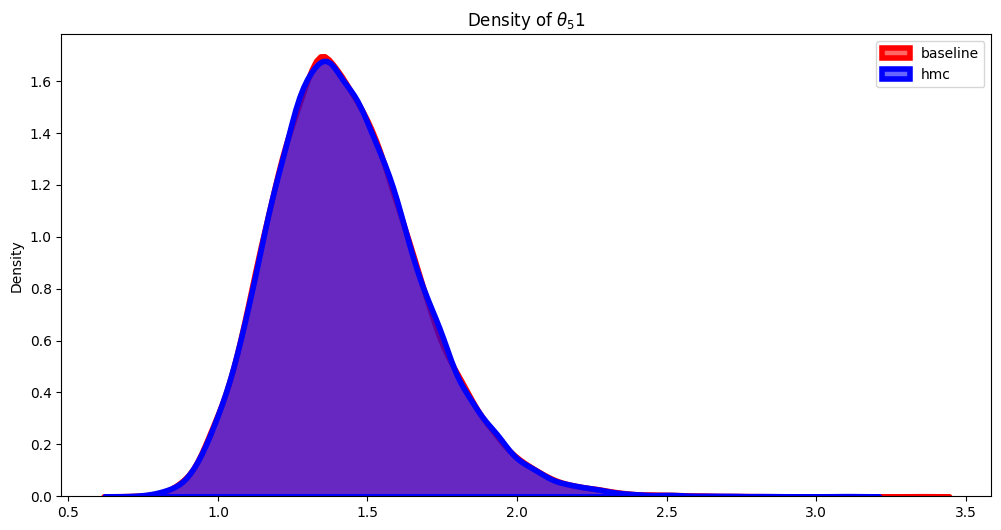

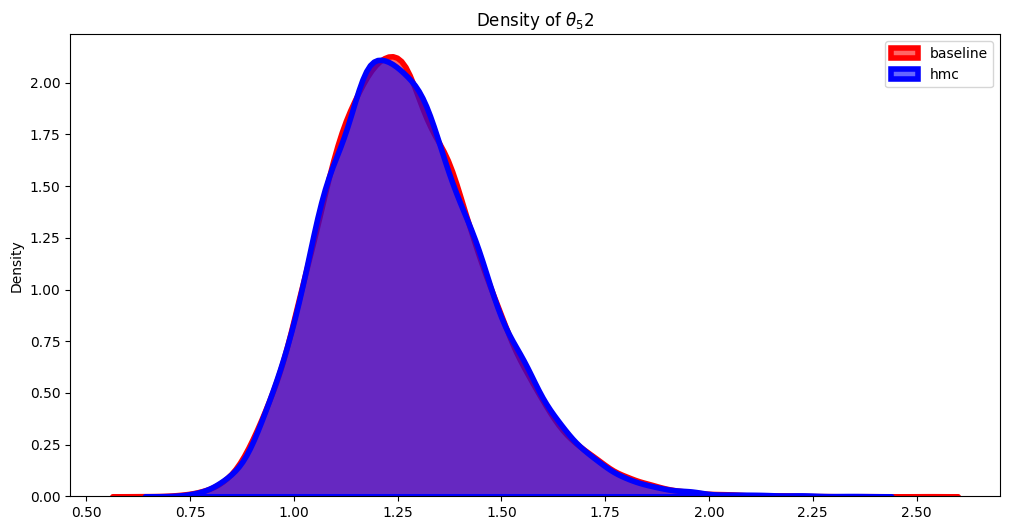

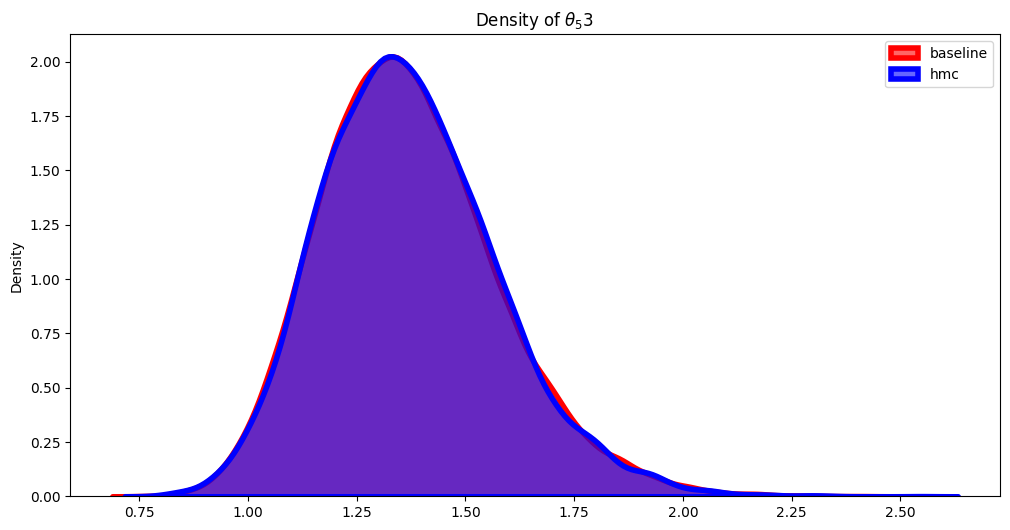

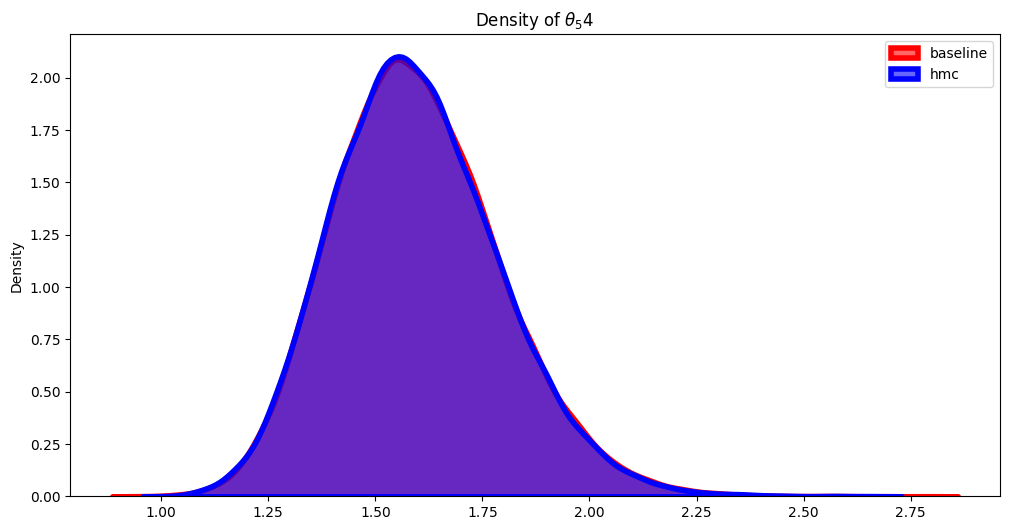

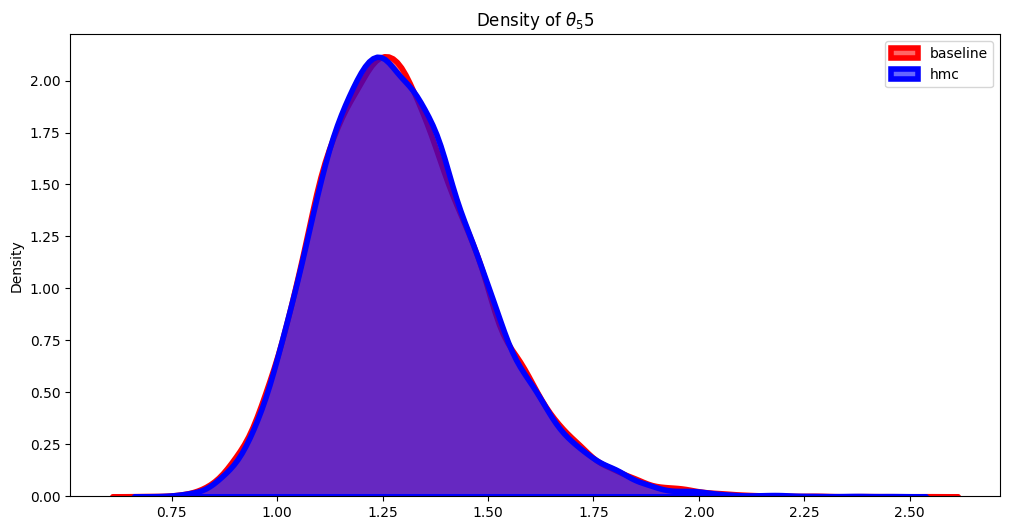

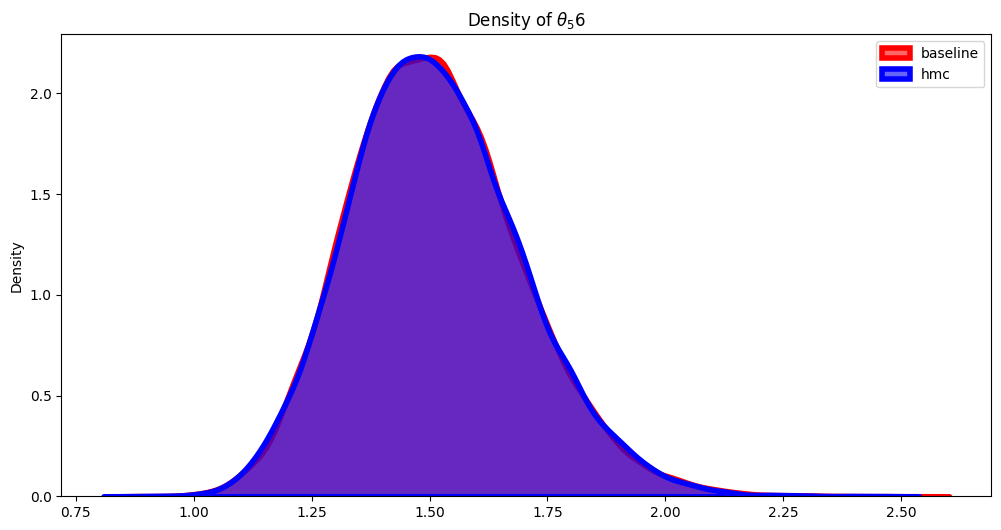

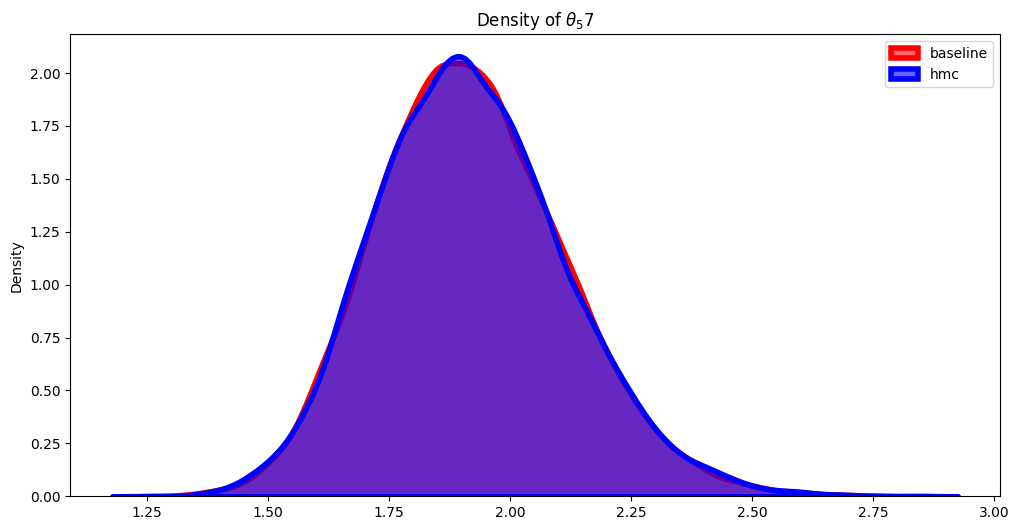

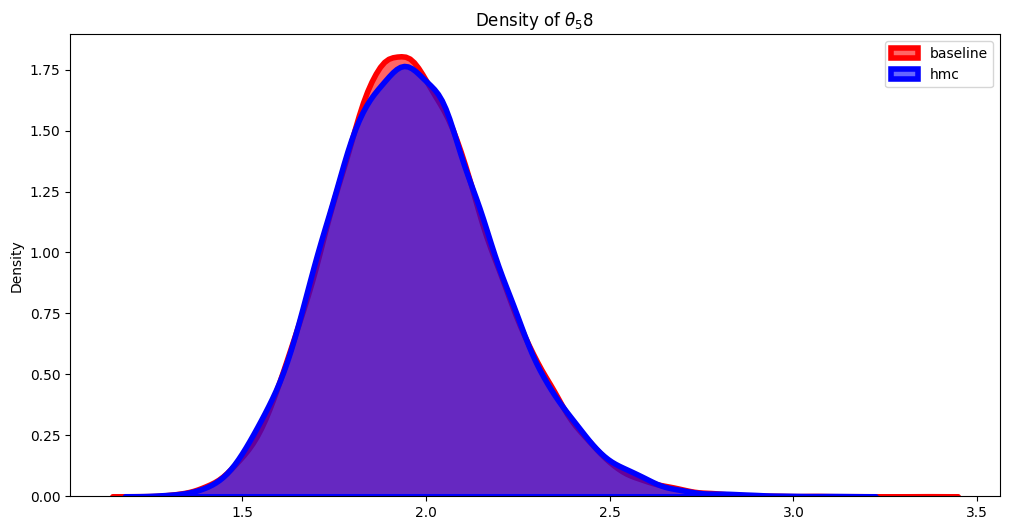

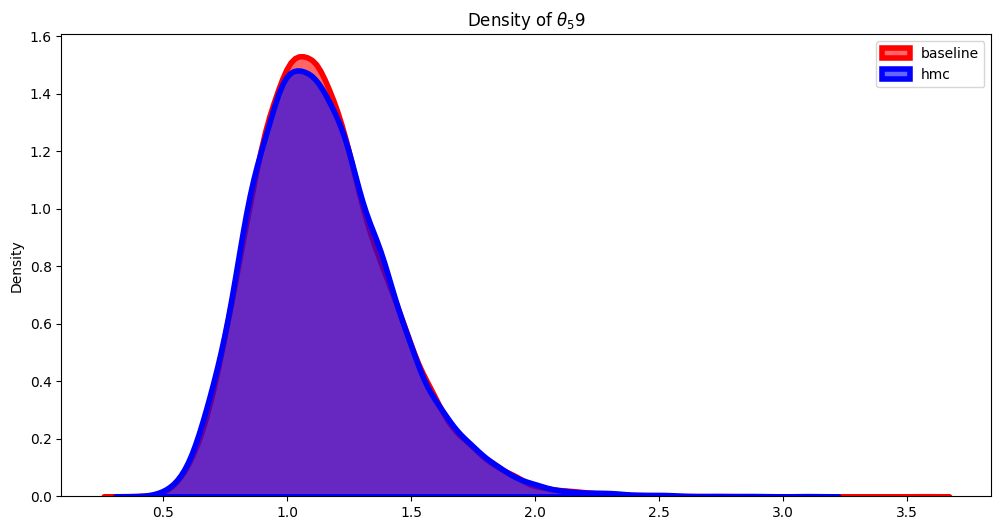

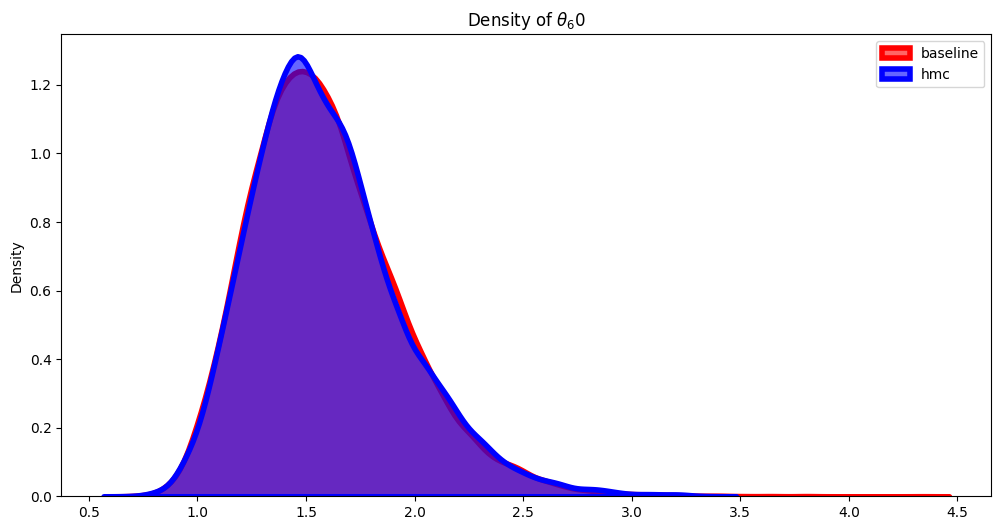

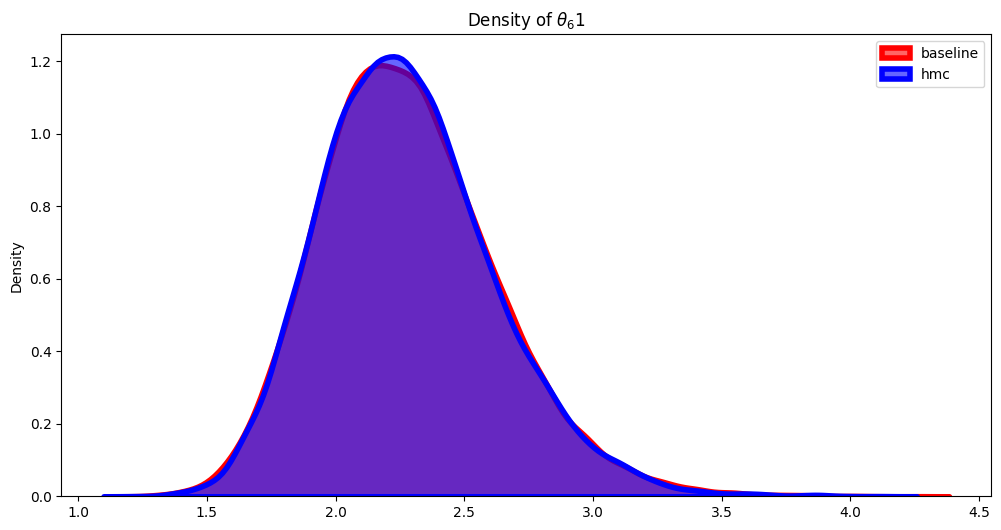

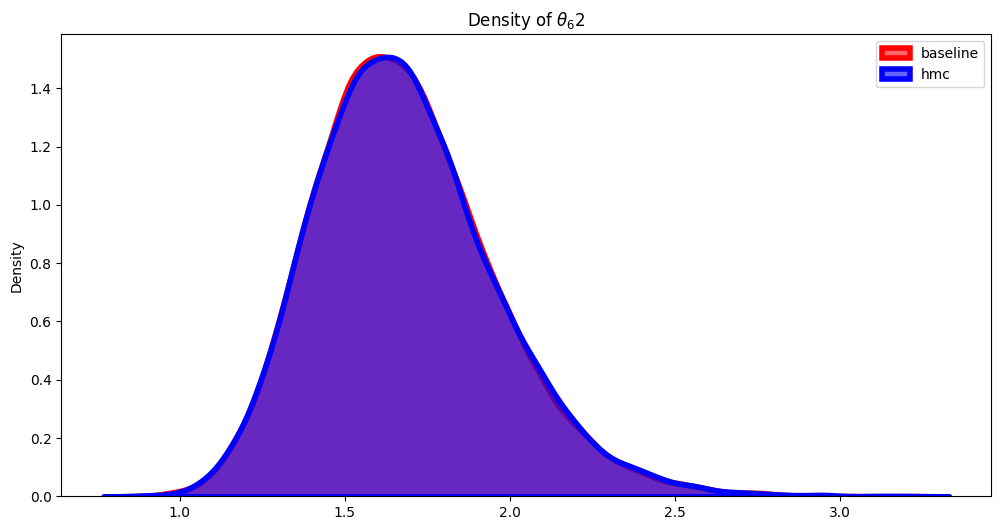

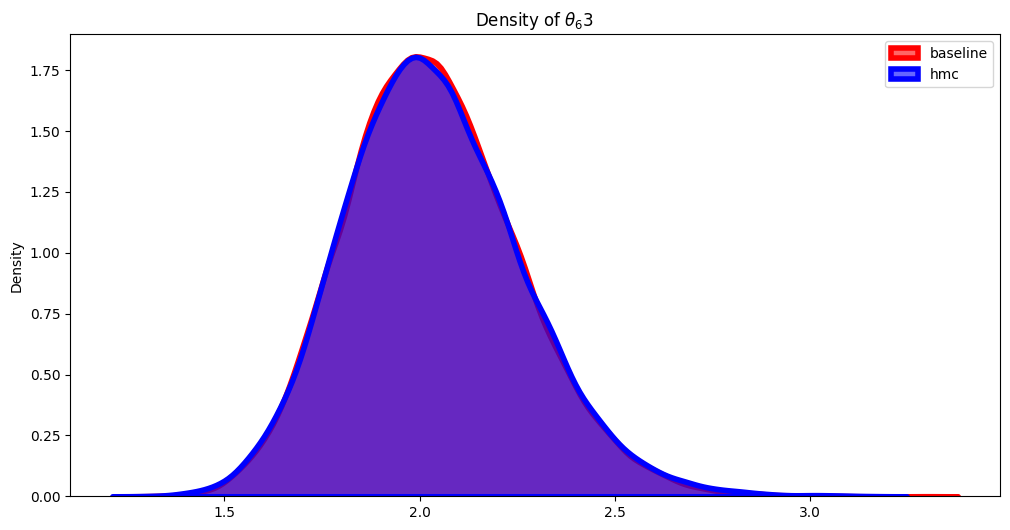

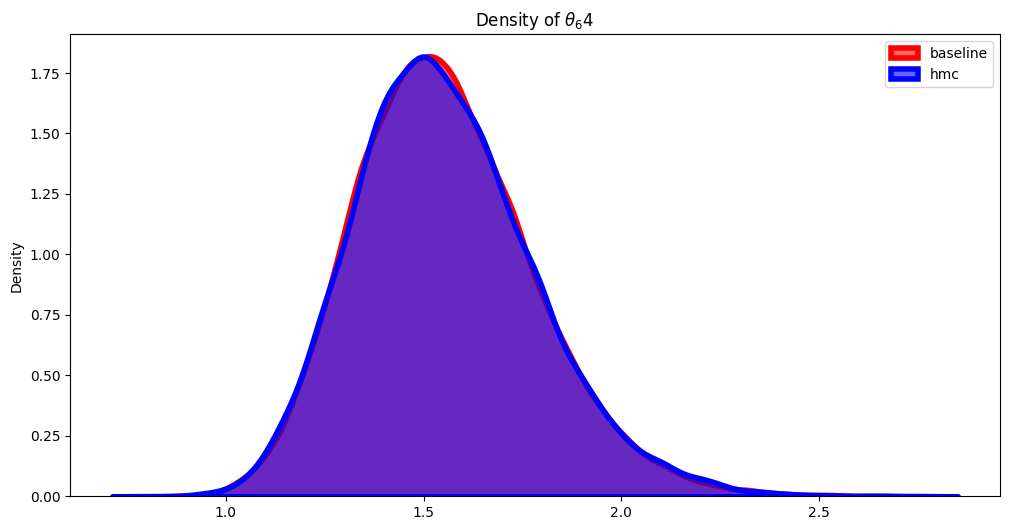

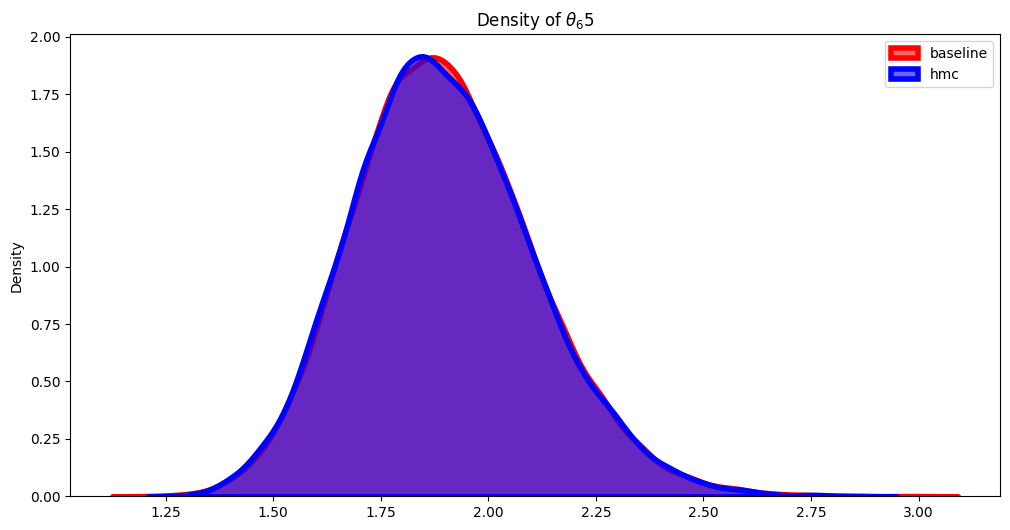

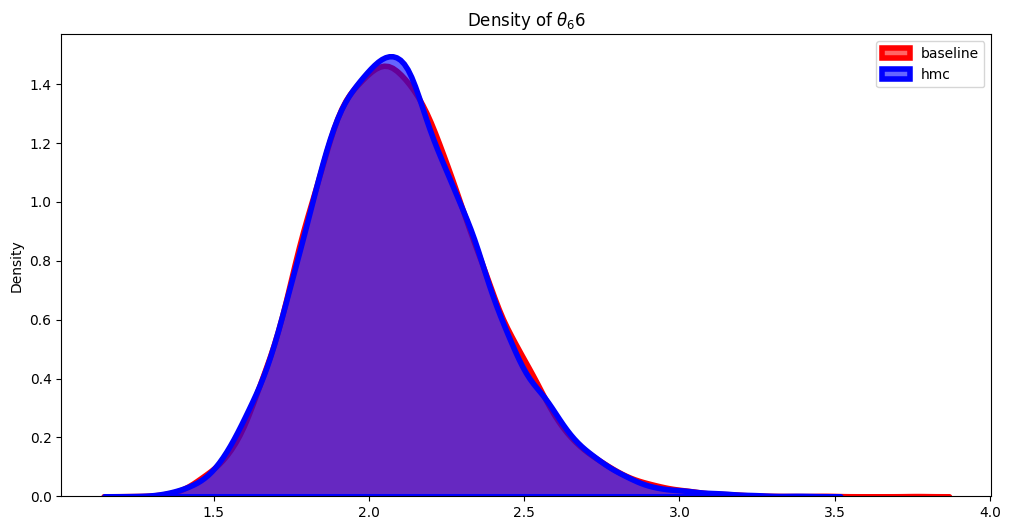

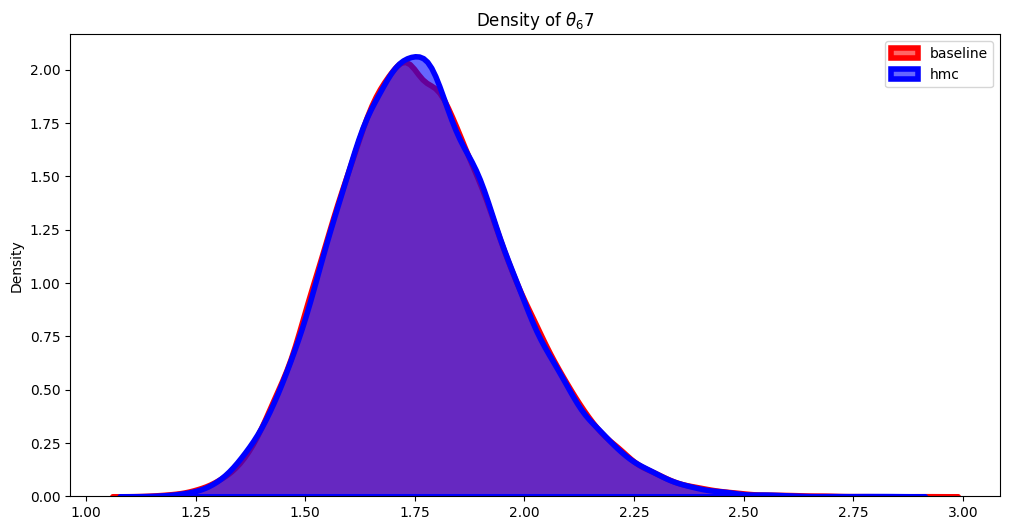

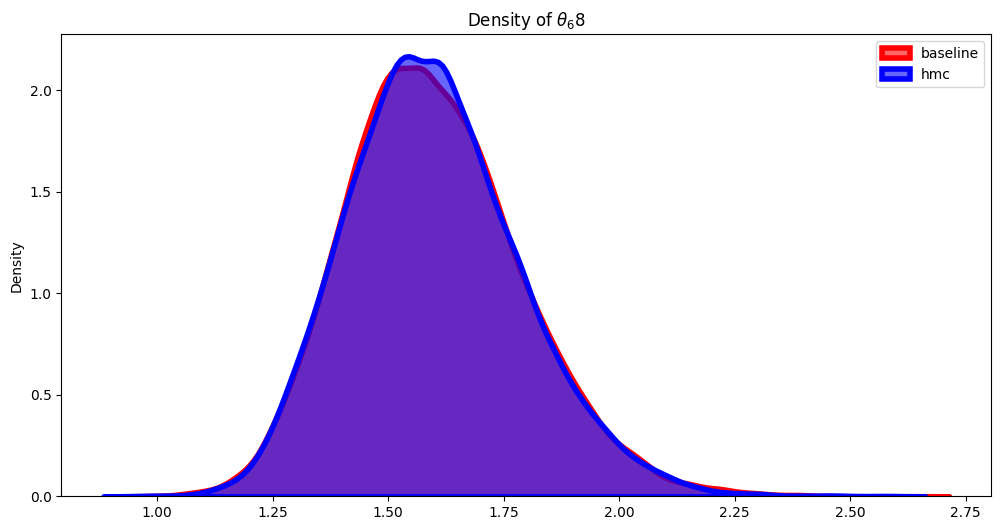

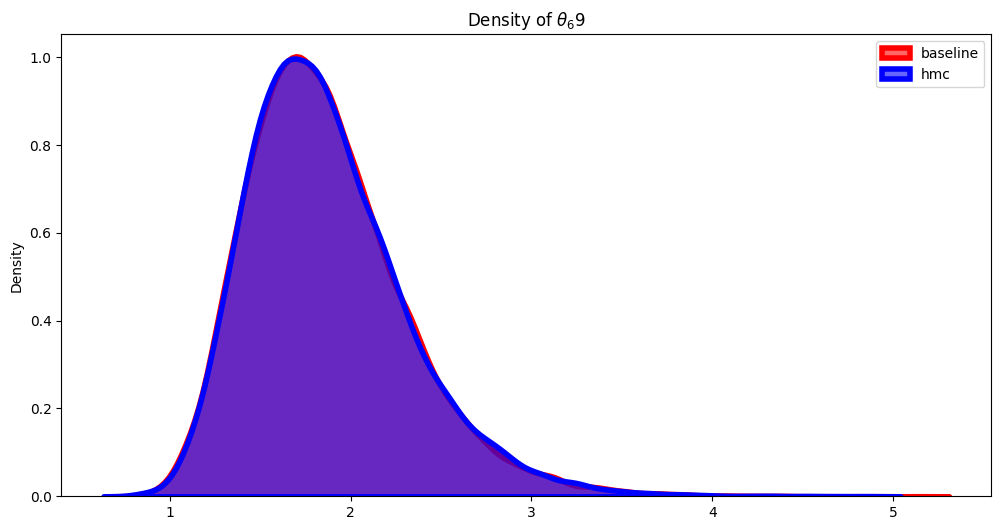

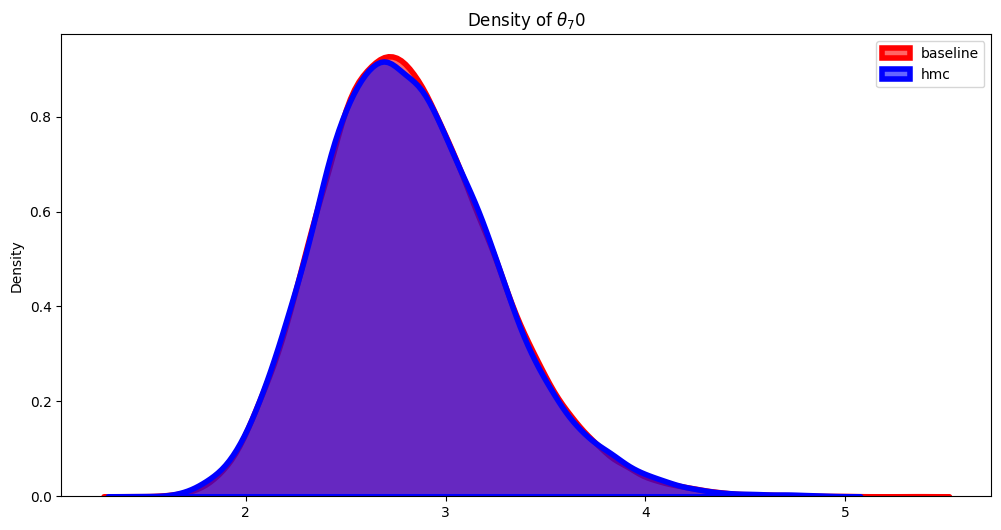

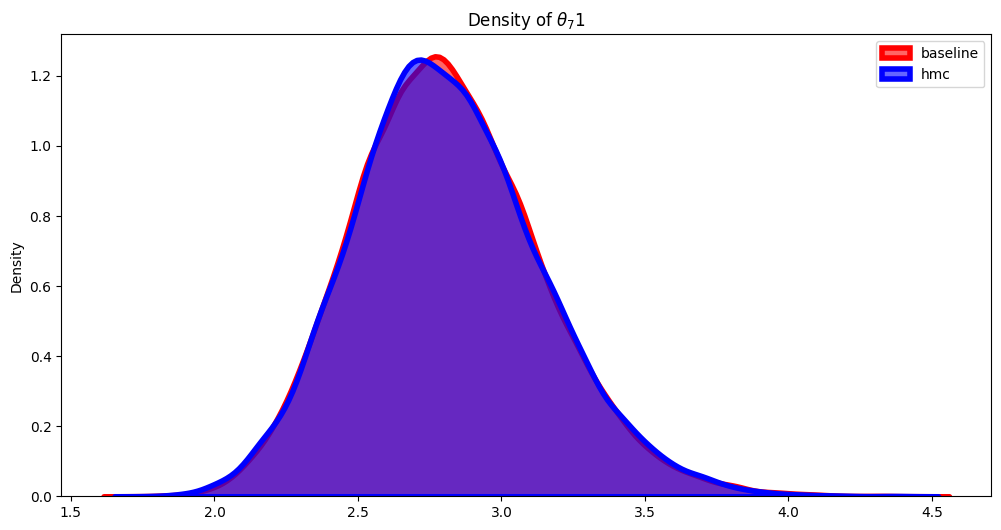

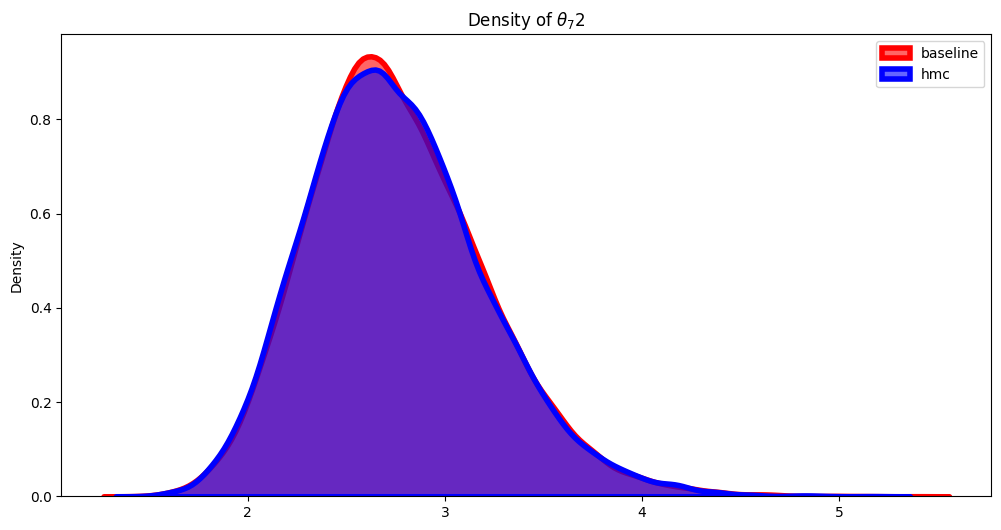

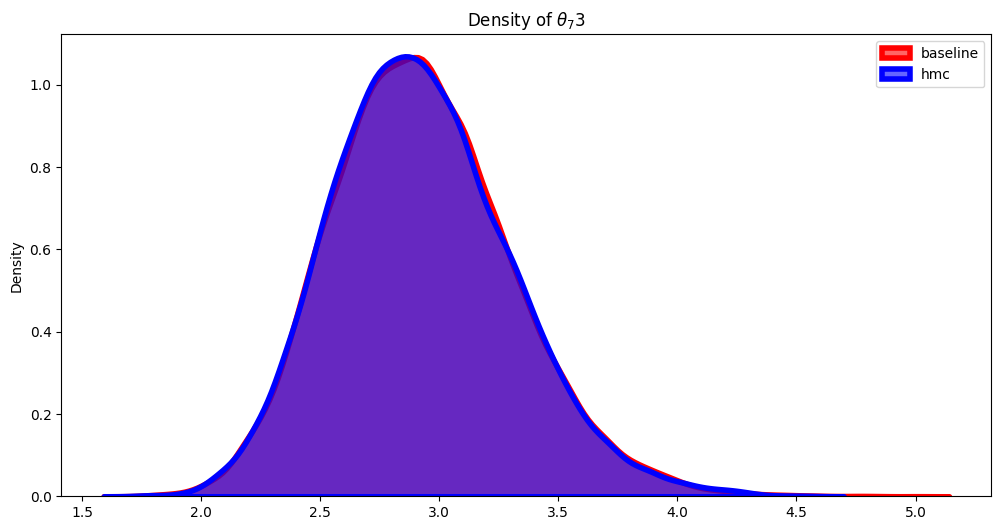

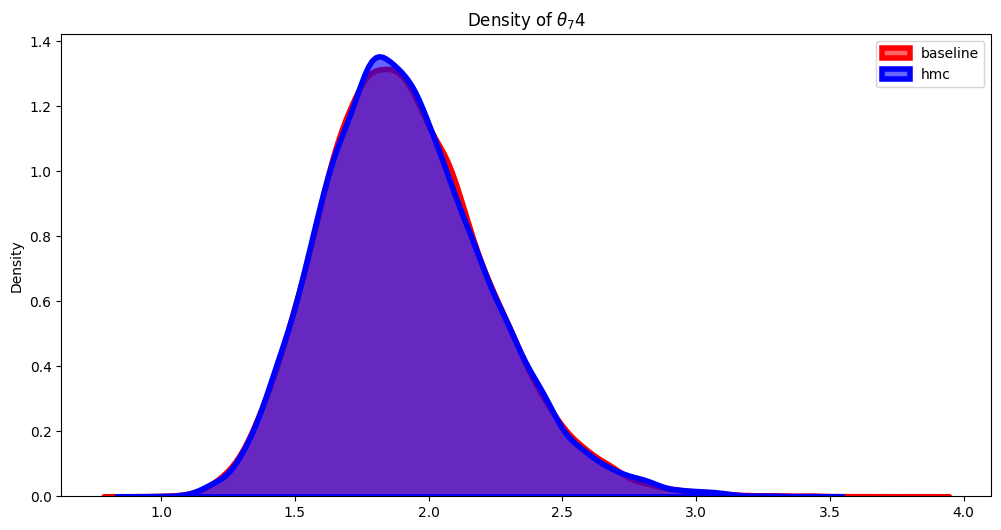

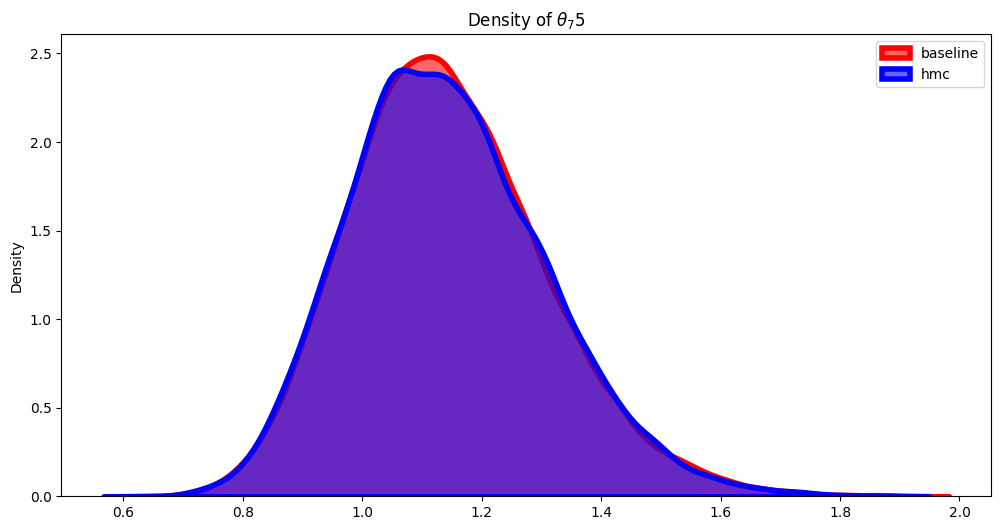

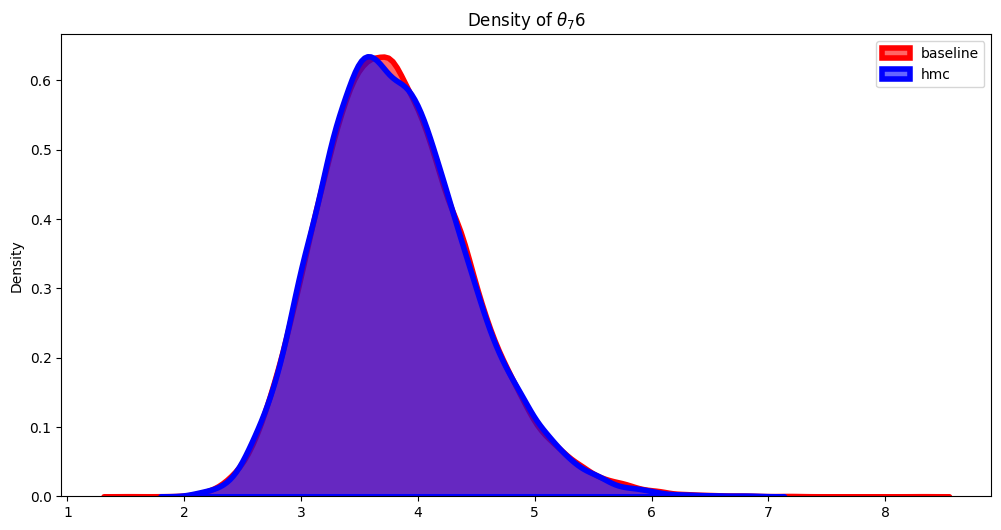

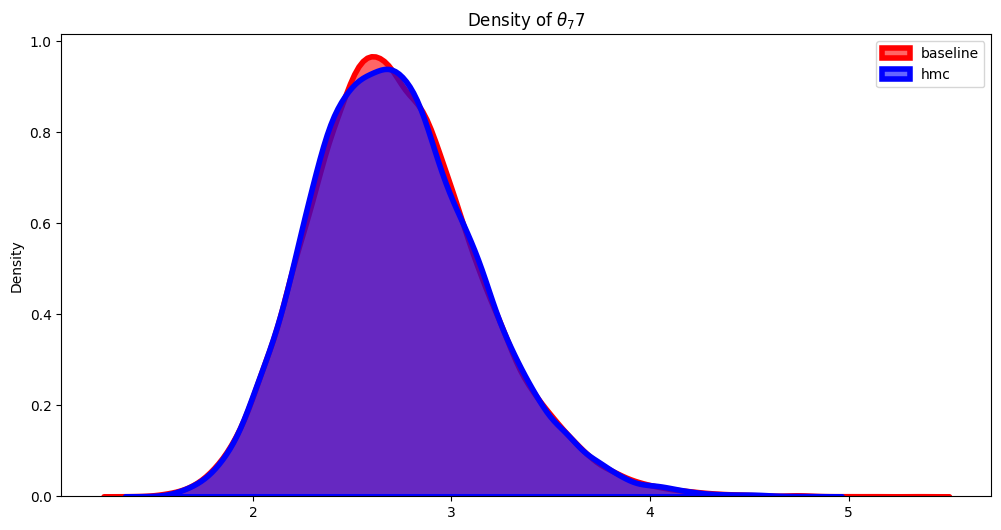

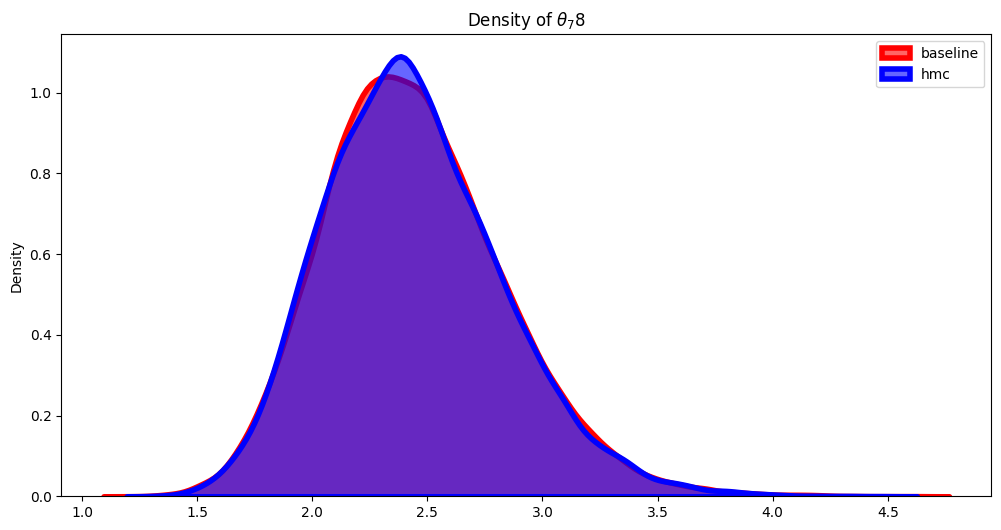

In [25]:


for i in range(78):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(theta_baseline[:, i], label=r'baseline', color='red', fill=True, alpha=0.6,linewidth=4) 
    sns.kdeplot(theta_hmc[:, i], label=r'hmc', color='blue', fill=True, alpha=0.6,linewidth=4)  
    # sns.kdeplot(theta_test[:, i], label=r'test', color='blue', fill=True, alpha=0.6,linewidth=4)  
    plt.title(r'Density of $\theta_'+str(i+1)+'$')
    plt.legend()
    # plt.savefig('results/compare/theta'+str(i+1)+'.png')
    plt.show()


In [26]:
mean_values = np.mean(theta_hmc, axis=0)
df_mean = pd.DataFrame(mean_values, index=pd.Index(range(1, len(mean_values) + 1), name="Site"))
df_mean.to_csv('mean_post_adj.csv', index=True)

In [27]:
sd_hmc=np.sqrt(np.var(theta_hmc,ddof=0,axis=0))
quantiles = np.quantile(theta_hmc, [0.1, 0.5, 0.9], axis=0).T
pd.DataFrame(quantiles).to_csv('quantiles.csv')

In [28]:
from scipy.stats import gaussian_kde
from scipy.stats import entropy
kl_divergences_theta = []

for idx in range(site):


    
    kde_func_unadjusted = gaussian_kde(theta_baseline[:, idx], bw_method='scott')
    kde_func_adjusted = gaussian_kde(theta_hmc[:, idx], bw_method='scott')

    common_grid = np.linspace(min(theta_baseline[:, idx].min(), theta_hmc[:, idx].min()), 
                            max(theta_baseline[:, idx].max(), theta_hmc[:, idx].max()), 
                            1000)
    density_unadjusted = kde_func_unadjusted(common_grid)
    density_adjusted = kde_func_adjusted(common_grid)
    density_unadjusted += 1e-20
    density_adjusted += 1e-20
    
    kl_div = entropy(density_unadjusted, density_adjusted)
    print(f'Site {idx+1} KL Divergence: {kl_div}')

    kl_divergences_theta.append({'Site': idx+1, 'KL_Divergence': kl_div})

kl_df_theta = pd.DataFrame(kl_divergences_theta)

# Save the DataFrame to a CSV file
kl_df_theta.to_csv('kl_theta.csv', index=False)

Site 1 KL Divergence: 0.0015161400033129235
Site 2 KL Divergence: 0.001330596945999558
Site 3 KL Divergence: 0.004077984696189866
Site 4 KL Divergence: 0.0010808835113186054
Site 5 KL Divergence: 0.0010808835113186054
Site 6 KL Divergence: 0.0010678502473439266
Site 7 KL Divergence: 0.0011922771656198042
Site 8 KL Divergence: 0.0017990368891814498
Site 9 KL Divergence: 0.001164999499650445
Site 10 KL Divergence: 0.0013250809692710655
Site 11 KL Divergence: 0.001463725314859146
Site 12 KL Divergence: 0.0005244424834464881
Site 13 KL Divergence: 0.001878460704372703
Site 14 KL Divergence: 0.0015521838009309877
Site 15 KL Divergence: 0.0014814687201470294
Site 16 KL Divergence: 0.0012745660276705065
Site 17 KL Divergence: 0.001018486793760617
Site 18 KL Divergence: 0.0010090741562368262
Site 19 KL Divergence: 0.0016438392161448418
Site 20 KL Divergence: 0.0010653404628725583
Site 21 KL Divergence: 0.0037866050625841043
Site 22 KL Divergence: 0.0005794336059238188
Site 23 KL Divergence: 0.